In [138]:
############Exploratory Data Analysis ##################

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
data = pd.read_csv('C://Users/asonawane/Desktop/project/finaldata.csv')

#print(data.head())
#print(data.info())


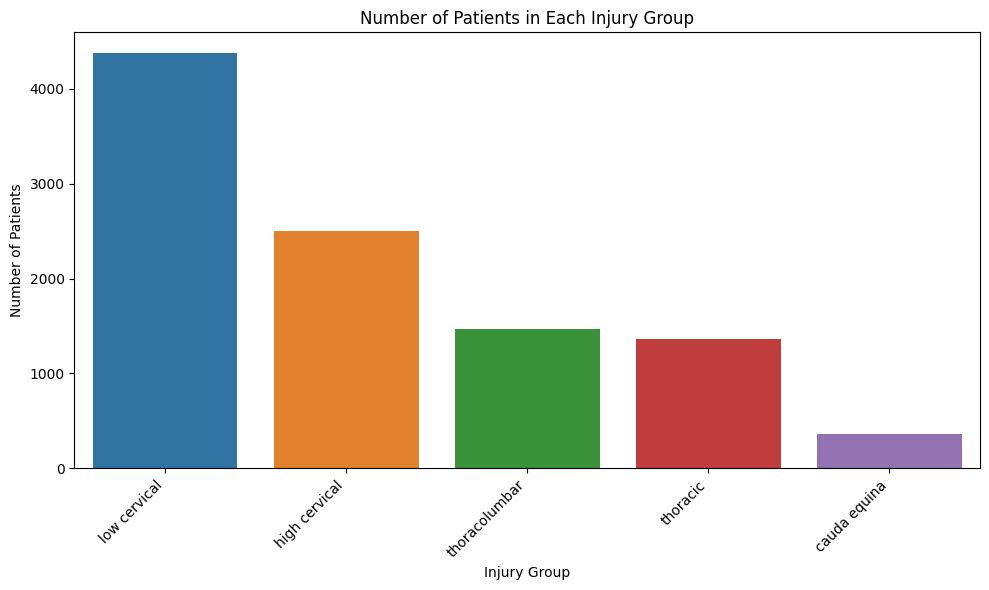

In [38]:

# Summary 
#print(data.describe())


# Data Visualization

# histogram for the number of patients in each injury group
patient_counts = data['InjuryGroup'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=patient_counts.index, y=patient_counts.values, hue=patient_counts.index, dodge=False)
plt.title('Number of Patients in Each Injury Group')
plt.xlabel('Injury Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()





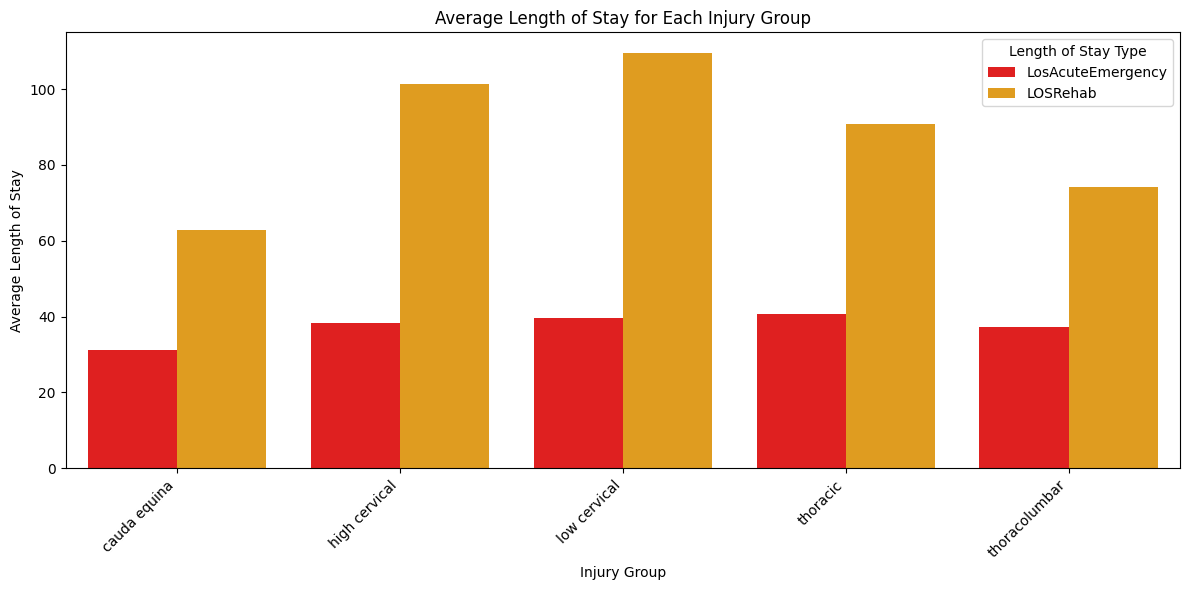

In [39]:
average_values = data.groupby('InjuryGroup')[['LosAcuteEmergency', 'LOSRehab']].mean().reset_index()
melted_values = average_values.melt(id_vars='InjuryGroup', var_name='Length of Stay Type', value_name='Average Length of Stay')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_values, x='InjuryGroup', y='Average Length of Stay', hue='Length of Stay Type', palette=['red', 'orange'])
plt.title('Average Length of Stay for Each Injury Group')
plt.xlabel('Injury Group')
plt.ylabel('Average Length of Stay')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Length of Stay Type')
plt.tight_layout()  
plt.show()

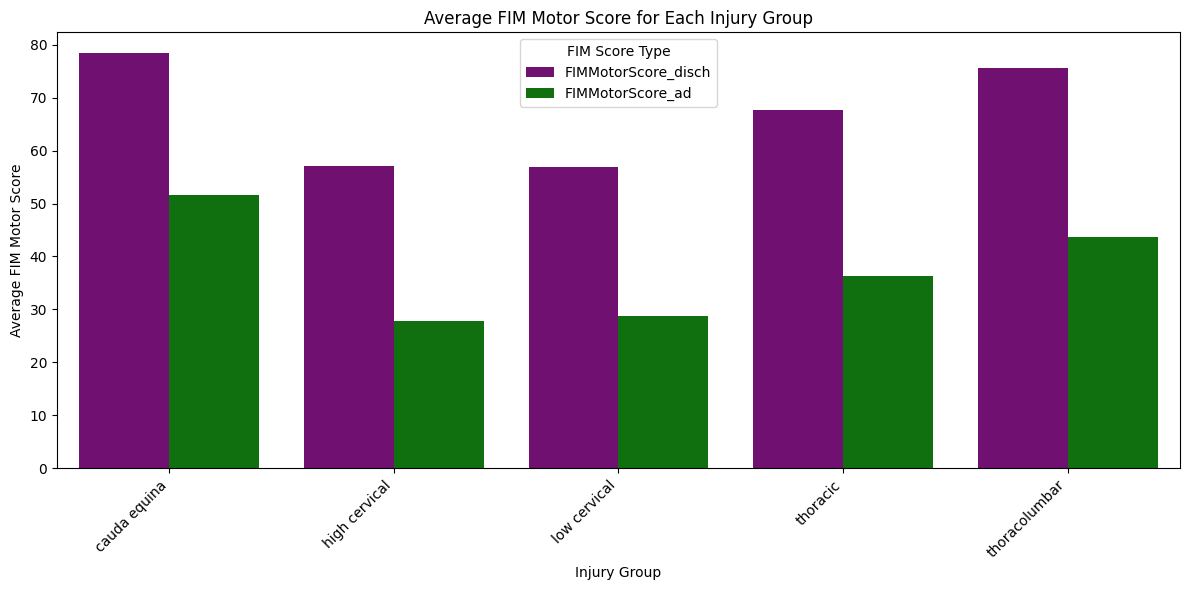

In [40]:
average_values_fim = data.groupby('InjuryGroup')[['FIMMotorScore_disch', 'FIMMotorScore_ad']].mean().reset_index()
melted_values_fim = average_values_fim.melt(id_vars='InjuryGroup', var_name='FIM Score Type', value_name='Average FIM Score')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_values_fim, x='InjuryGroup', y='Average FIM Score', hue='FIM Score Type', palette=['purple', 'green'])
plt.title('Average FIM Motor Score for Each Injury Group')
plt.xlabel('Injury Group')
plt.ylabel('Average FIM Motor Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='FIM Score Type')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


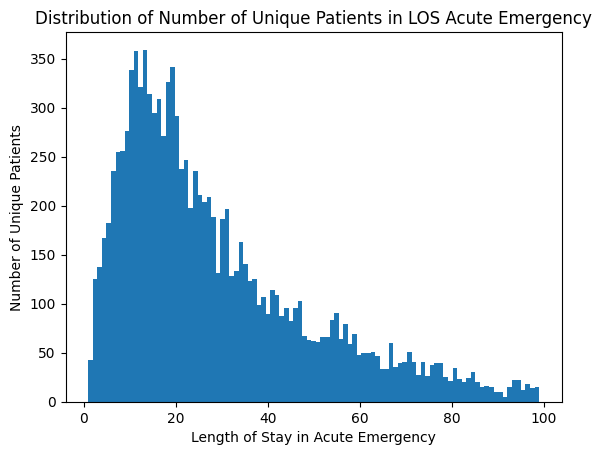

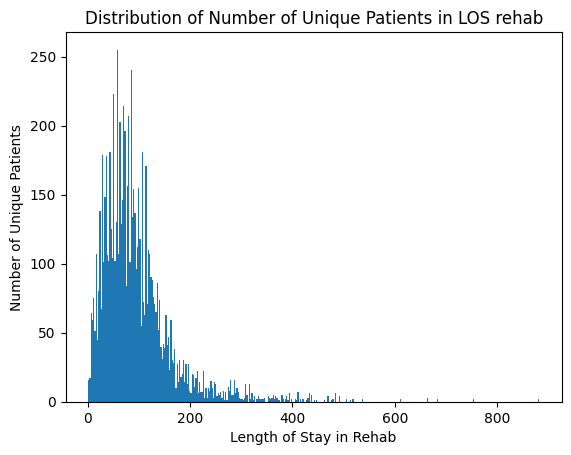

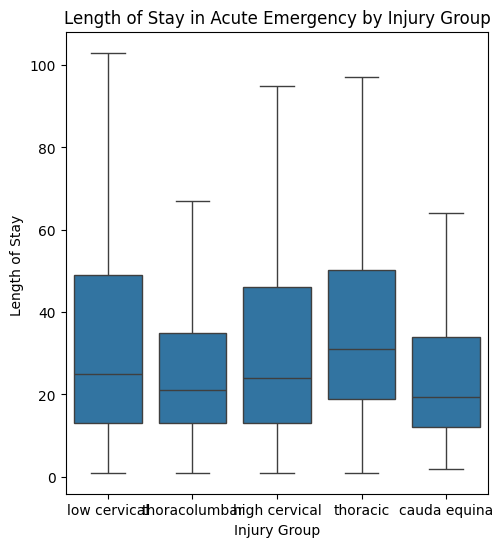

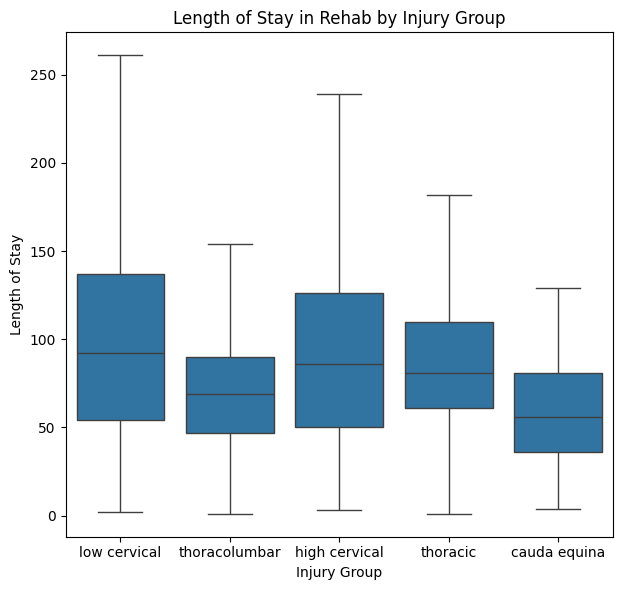

In [41]:

# Histograms
# Group the data by 'LosAcuteEmergency' and count unique patients
data2= data[data['LosAcuteEmergency']<100]
patients_by_acute = data2.groupby('LosAcuteEmergency')['UniqueId'].nunique()


# Plot the histogram
plt.hist(data2['LosAcuteEmergency'], bins=len(patients_by_acute))
plt.xlabel('Length of Stay in Acute Emergency')
plt.ylabel('Number of Unique Patients')
plt.title('Distribution of Number of Unique Patients in LOS Acute Emergency')
#plt.xlim(0, 2000)
plt.show()


# Second subplot
# Group the data by 'LosRehab' and count unique patients
patients_by_los = data.groupby('LOSRehab')['UniqueId'].nunique()

# Plot the histogram
plt.hist(data['LOSRehab'], bins=len(patients_by_los))
plt.xlabel('Length of Stay in Rehab')
plt.ylabel('Number of Unique Patients')
plt.title('Distribution of Number of Unique Patients in LOS rehab')
#plt.xlim(0, 500)
plt.show()

#boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='InjuryGroup', y='LosAcuteEmergency', showfliers=False) # excluded outlier 
plt.title('Length of Stay in Acute Emergency by Injury Group')
plt.xlabel('Injury Group')
plt.ylabel('Length of Stay ')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='InjuryGroup', y='LOSRehab',showfliers=False) # excluded outlier )
plt.title('Length of Stay in Rehab by Injury Group')
plt.xlabel('Injury Group')
plt.ylabel('Length of Stay')

plt.tight_layout()
plt.show()


In [42]:
data['LosAcuteEmergency'].describe()


count    11999.000000
mean        38.817401
std        112.406541
min          1.000000
25%         13.000000
50%         24.000000
75%         45.000000
max      10975.000000
Name: LosAcuteEmergency, dtype: float64

<Figure size 1400x600 with 0 Axes>

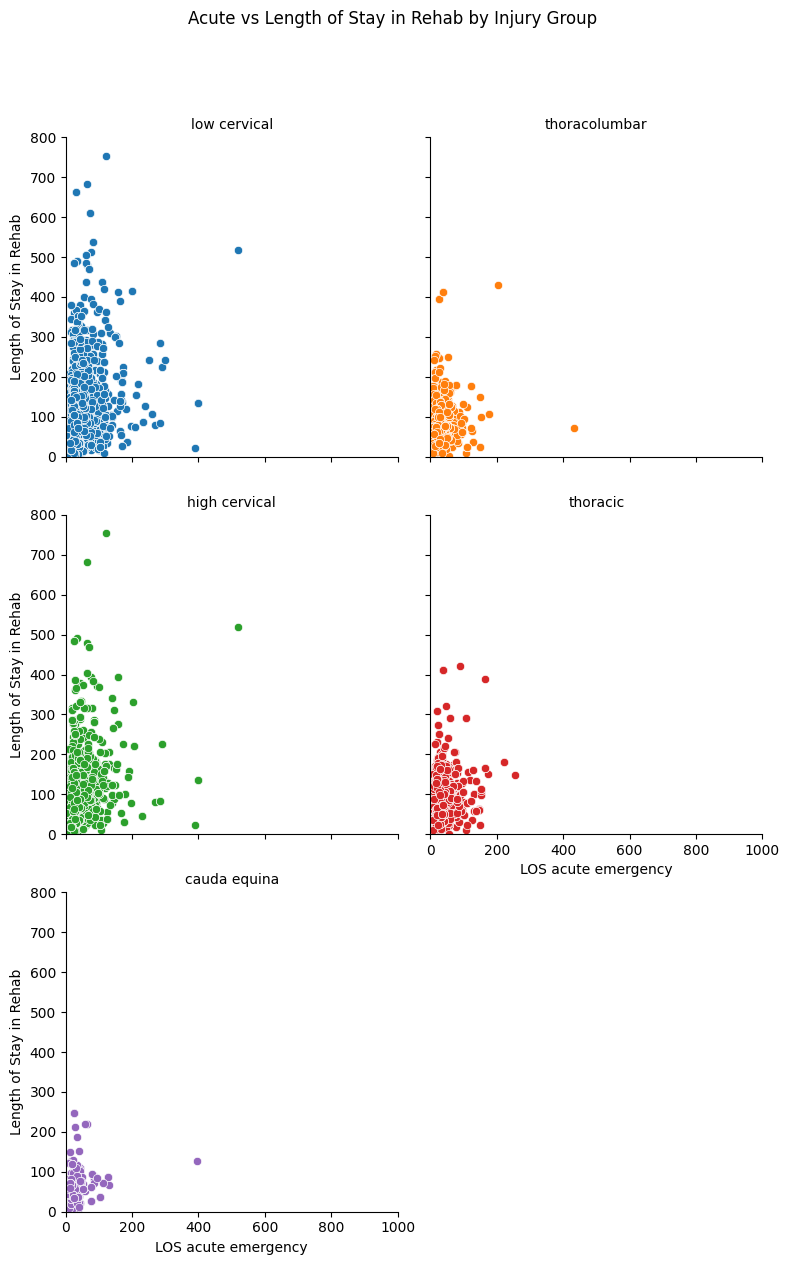

In [43]:
# Plotting scatter plots for 'LosAcuteEmergency' vs 'LOSRehab' for each Injury Group
plt.figure(figsize=(14, 6))

g = sns.FacetGrid(data, col='InjuryGroup', hue='InjuryGroup', col_wrap=2, height=4)

# Map scatter plots with outliers excluded
g.map(sns.scatterplot, 'LosAcuteEmergency', 'LOSRehab')

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('LOS acute emergency', 'Length of Stay in Rehab')

# Set the overall title
plt.suptitle('Acute vs Length of Stay in Rehab by Injury Group ', y=1.05)
plt.xlim(0, 1000)  # Limit x-axis from 0 to 1000
plt.ylim(0, 800)  # Limit y-axis from 0 to 8000
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

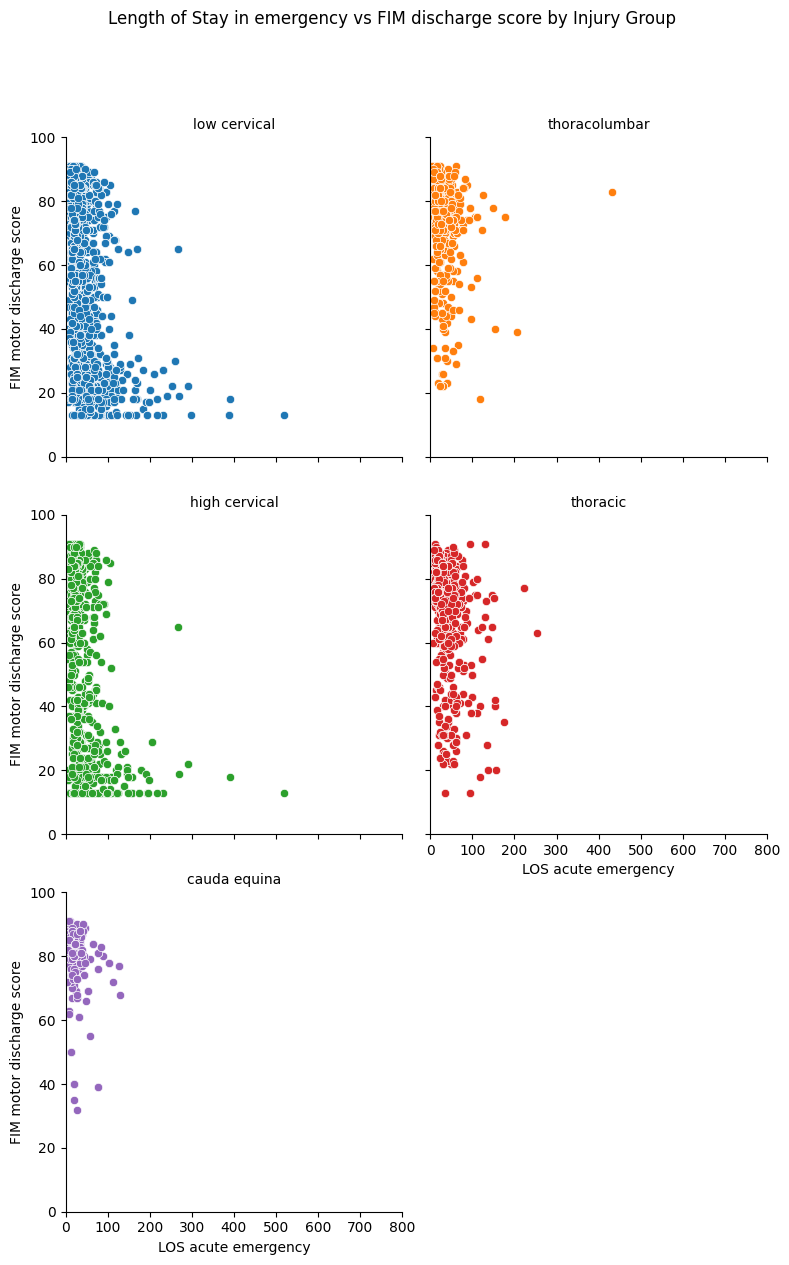

In [44]:
# Plotting scatter plots for 'LosAcuteEmergency' vs 'FIMMotorScore_disch' for each Injury Group
plt.figure(figsize=(14, 6))

g = sns.FacetGrid(data, col='InjuryGroup', hue='InjuryGroup', col_wrap=2, height=4)

# Map scatter plots with outliers excluded
g.map(sns.scatterplot, 'LosAcuteEmergency', 'FIMMotorScore_disch')

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('LOS acute emergency', 'FIM motor discharge score')

# Set the overall title
plt.suptitle('Length of Stay in emergency vs FIM discharge score by Injury Group ', y=1.05)
plt.xlim(0, 800)  # Limit x-axis from 0 to 1000
plt.ylim(0, 100)  # Limit y-axis from 0 to 8000
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

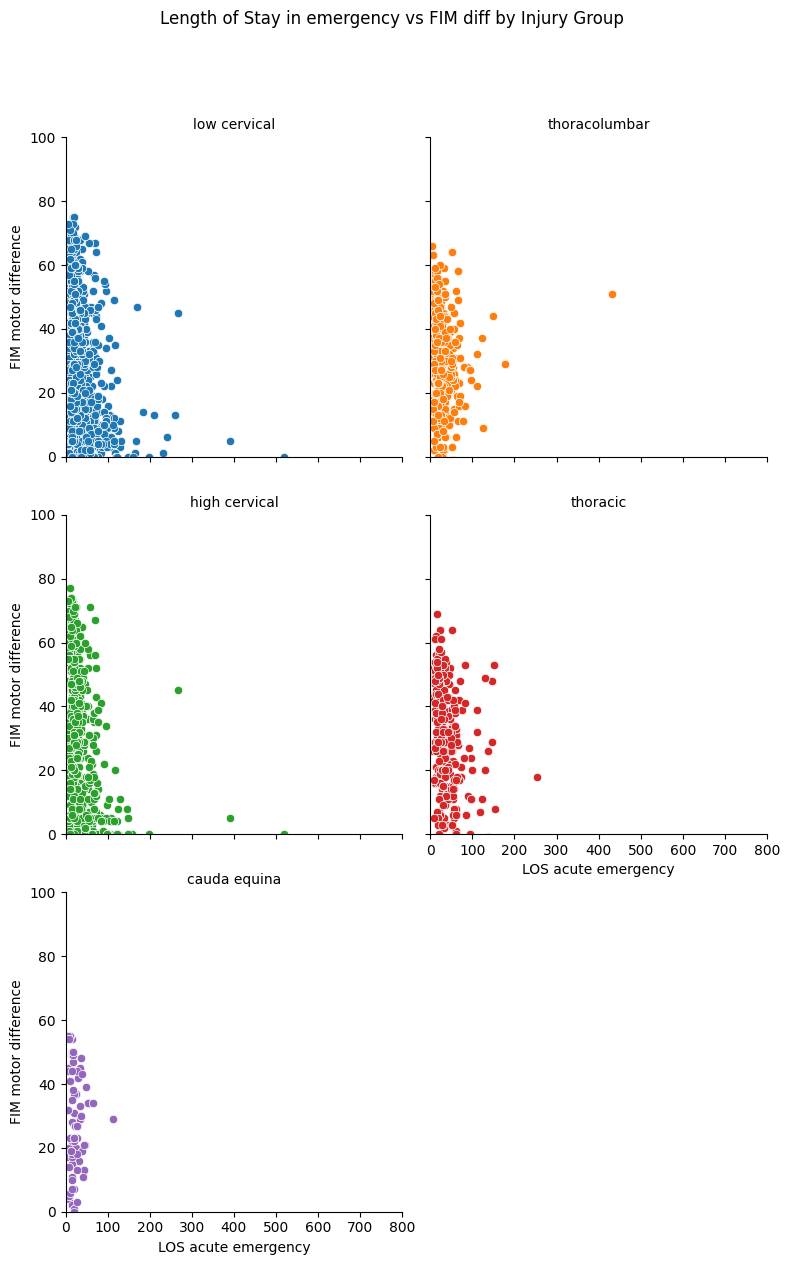

In [45]:
# Plotting scatter plots for 'LosAcuteEmergency' vs 'FIMMotorScore_disch' for each Injury Group
plt.figure(figsize=(14, 6))

g = sns.FacetGrid(data, col='InjuryGroup', hue='InjuryGroup', col_wrap=2, height=4)

# Map scatter plots with outliers excluded
g.map(sns.scatterplot, 'LosAcuteEmergency', 'FIMMotorDif')

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('LOS acute emergency', 'FIM motor difference')

# Set the overall title
plt.suptitle('Length of Stay in emergency vs FIM diff by Injury Group ', y=1.05)
plt.xlim(0, 800)  # Limit x-axis from 0 to 1000
plt.ylim(0, 100)  # Limit y-axis from 0 to 8000
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

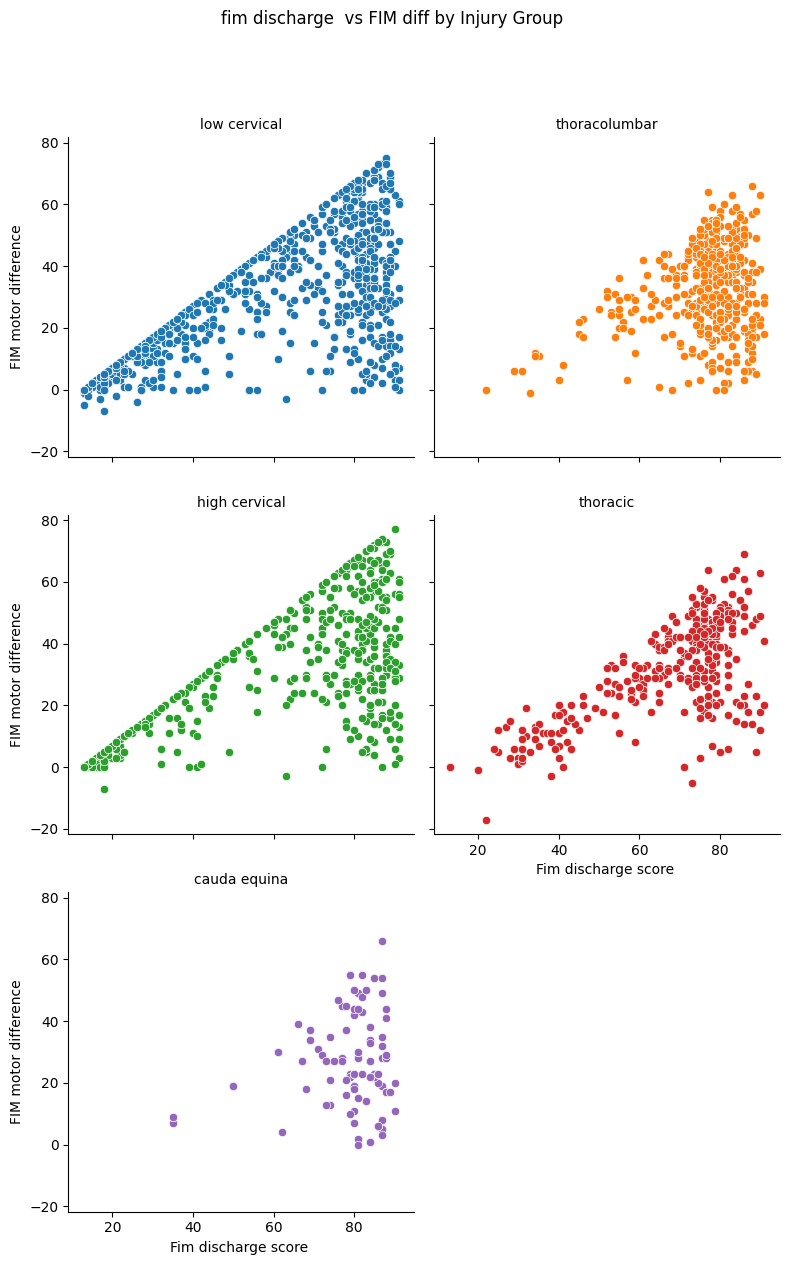

In [46]:
# Plotting scatter plots for 'LosAcuteEmergency' vs 'FIMMotorScore_disch' for each Injury Group
plt.figure(figsize=(14, 6))

g = sns.FacetGrid(data, col='InjuryGroup', hue='InjuryGroup', col_wrap=2, height=4)

# Map scatter plots with outliers excluded
g.map(sns.scatterplot, 'FIMMotorScore_disch', 'FIMMotorDif')

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Fim discharge score ', 'FIM motor difference')

# Set the overall title
plt.suptitle('fim discharge  vs FIM diff by Injury Group ', y=1.05)
#plt.xlim(0, 800)  # Limit x-axis from 0 to 1000
#plt.ylim(0, 100)  # Limit y-axis from 0 to 8000
plt.tight_layout()
plt.show()


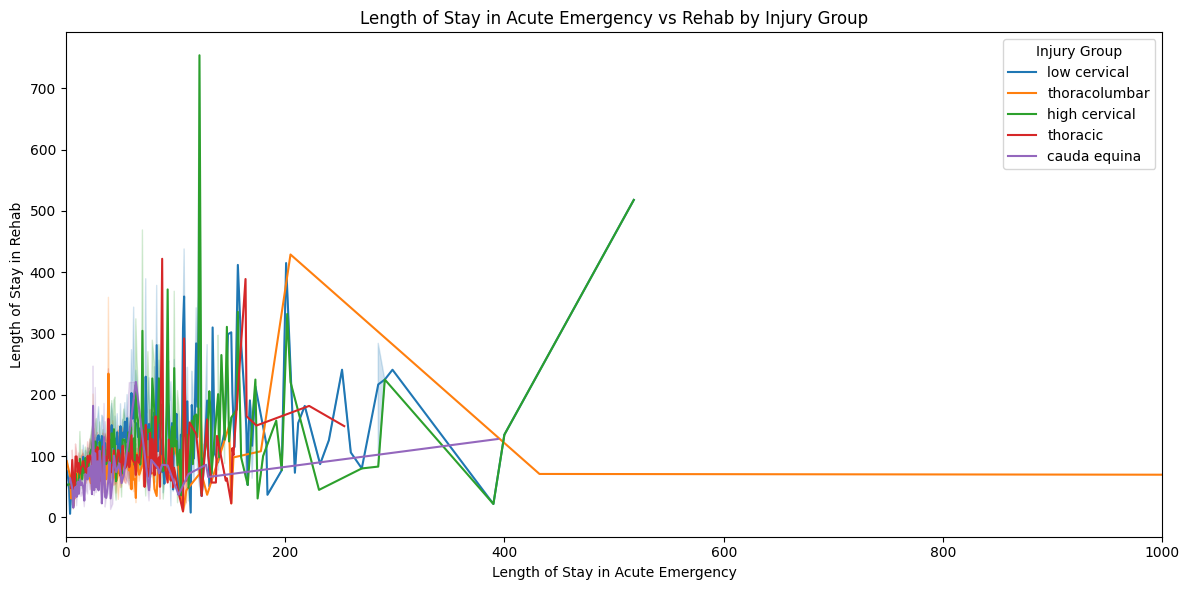

In [47]:

# Line plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='LosAcuteEmergency', y='LOSRehab', hue='InjuryGroup', markers=True)
plt.title('Length of Stay in Acute Emergency vs Rehab by Injury Group')
plt.xlabel('Length of Stay in Acute Emergency')
plt.ylabel('Length of Stay in Rehab')
plt.legend(title='Injury Group')
plt.xlim(0, 1000)  # Limit x-axis from 0 to 1000
#plt.ylim(0, 100)  # Limit y-axis from 0 to 8000
plt.tight_layout()
plt.show()

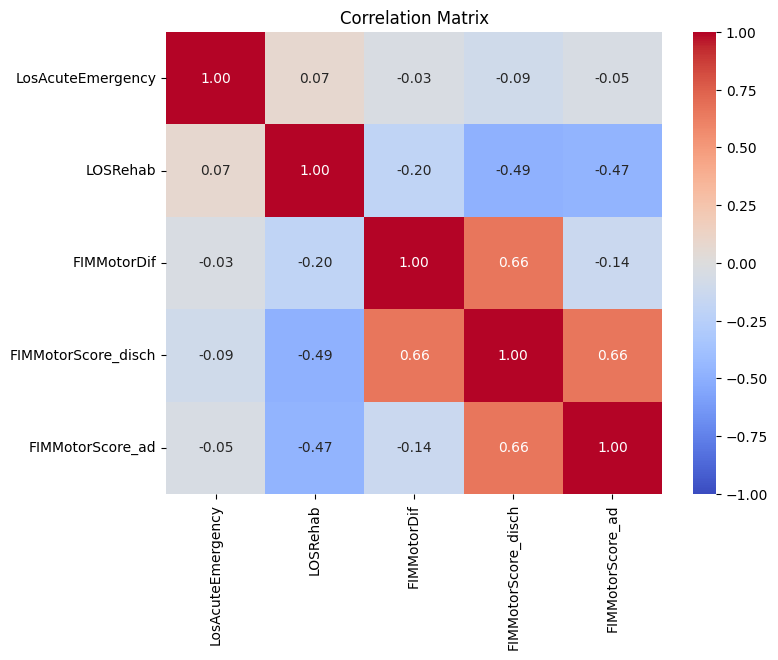

In [48]:
############ Correlation analysis ##################

correlation_matrix = data[['LosAcuteEmergency', 'LOSRehab','FIMMotorDif', 'FIMMotorScore_disch', 'FIMMotorScore_ad']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


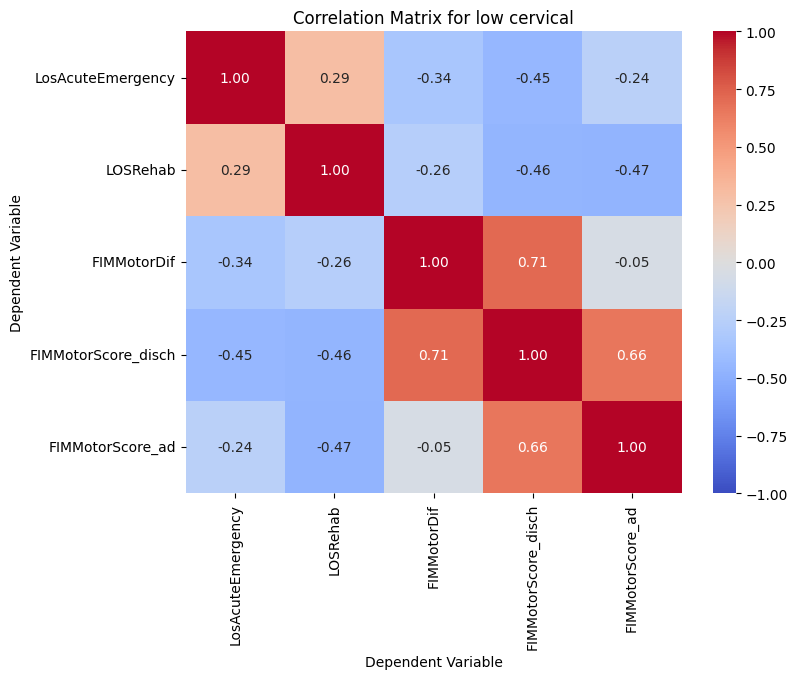

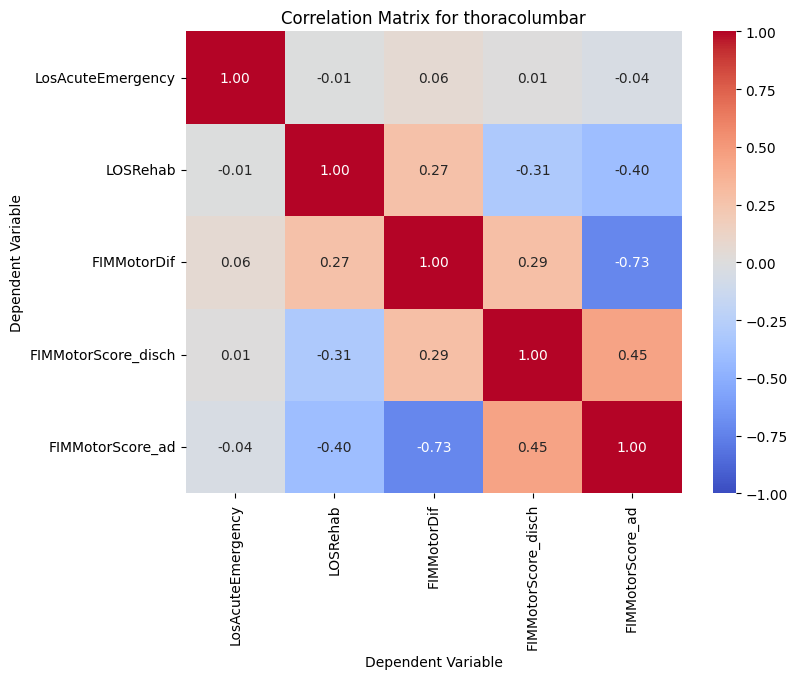

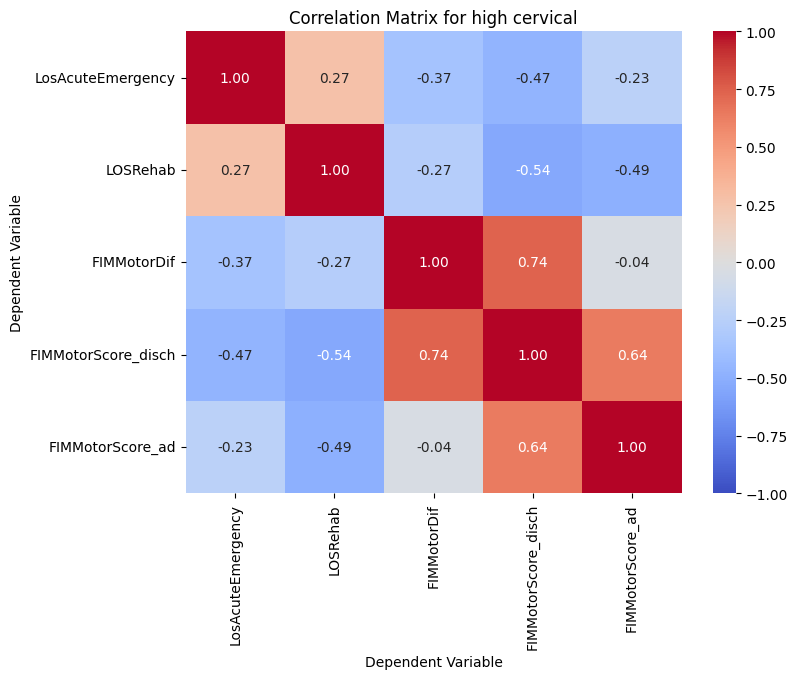

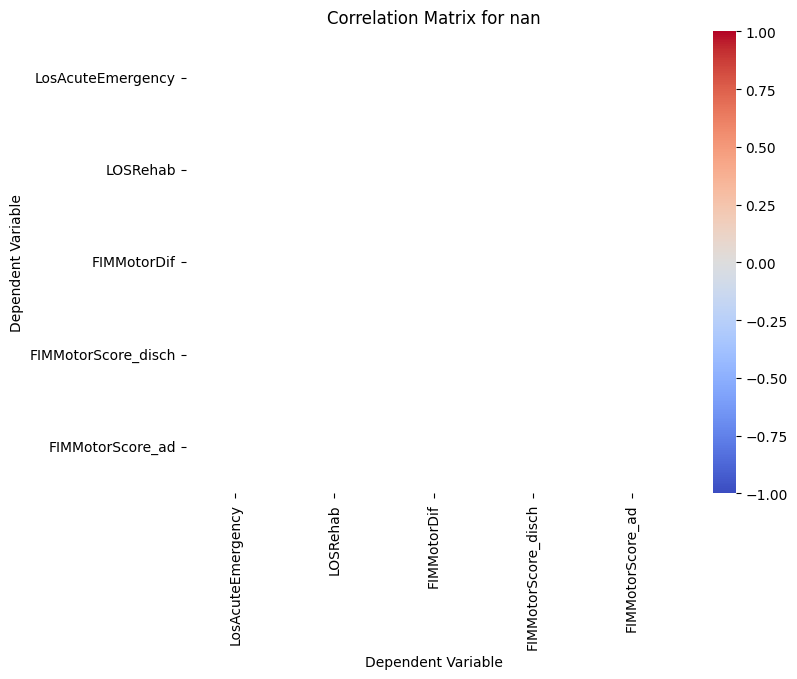

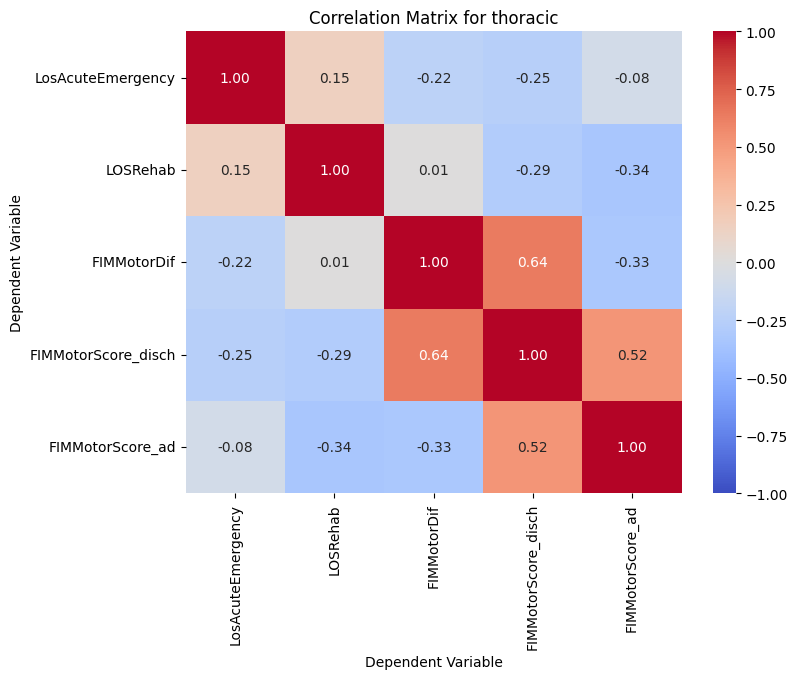

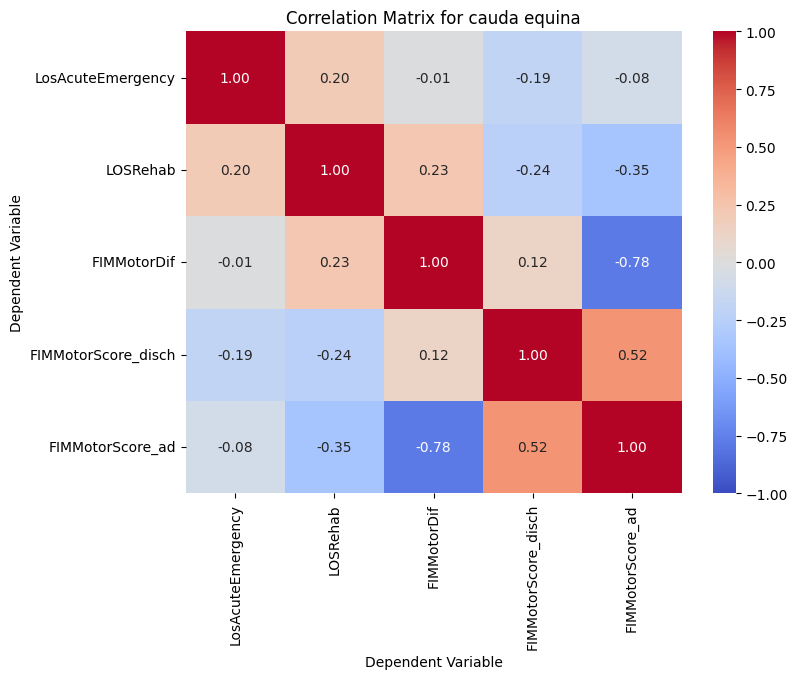

In [49]:
dependent_variables = ['LosAcuteEmergency', 'LOSRehab', 'FIMMotorDif','FIMMotorScore_disch', 'FIMMotorScore_ad']
independent_variable = 'InjuryGroup'

# Get unique injury types
injury_types = data[independent_variable].unique()

# Create a correlation matrix and heatmap for each injury type
for injury_type in injury_types:
    # Filter data for the current injury type
    subset_data = data[data[independent_variable] == injury_type]
    
    # Calculate the correlation matrix
    correlation_matrix = subset_data[dependent_variables].corr()
    
    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {injury_type}')
    plt.xlabel('Dependent Variable')
    plt.ylabel('Dependent Variable')
    plt.show()


R2 score on training data: 0.10699300077434137
R2 score on testing data: 0.08240208508358549


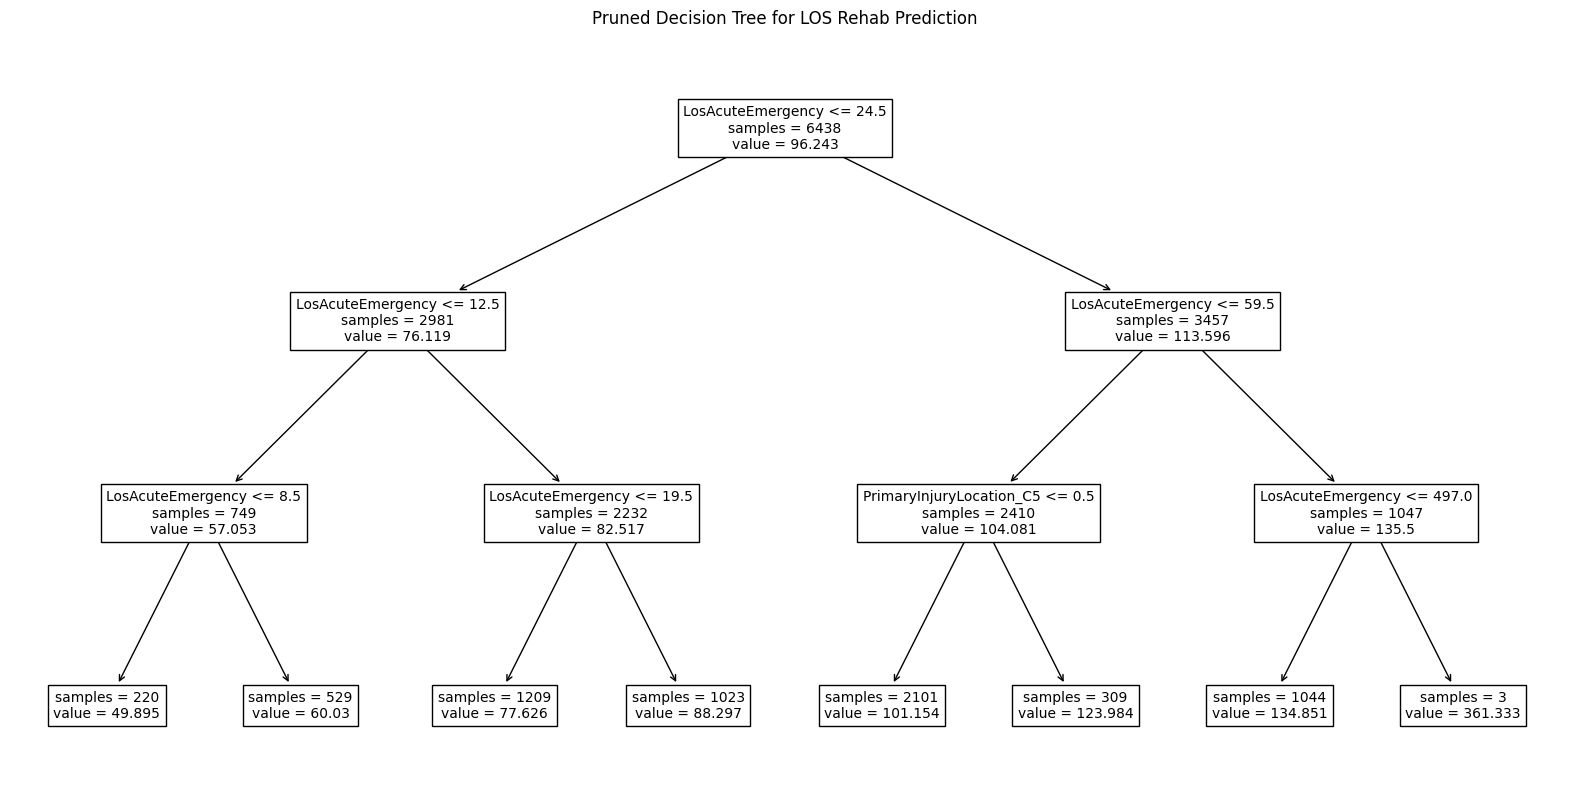

In [50]:
############################### target variable 'LOSRehab' ###############################

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'data' contains the dataset with 'LOSRehab', 'InjuryGroup', and 'LosAcuteEmergency' columns
data = data.dropna(subset=['LOSRehab'])

# Splitting the data into features (X) and target variable (y)
X = data[['PrimaryInjuryLocation', 'LosAcuteEmergency']]
y = data['LOSRehab']


#Convert categorical variable 'InjuryGroup' into dummy/indicator variables
X = pd.get_dummies(X, columns=['PrimaryInjuryLocation'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor with pruning
decision_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01, max_depth=3)

# Fitting the model
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Calculating R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"R2 score on training data: {r2_train}")
print(f"R2 score on testing data: {r2_test}")

# Visualizing the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, fontsize=10, impurity=False)
plt.title("Pruned Decision Tree for LOS Rehab Prediction")
plt.show()


R-squared score (Train): 0.270485521190611
R-squared score (Test): 0.24669809691526579


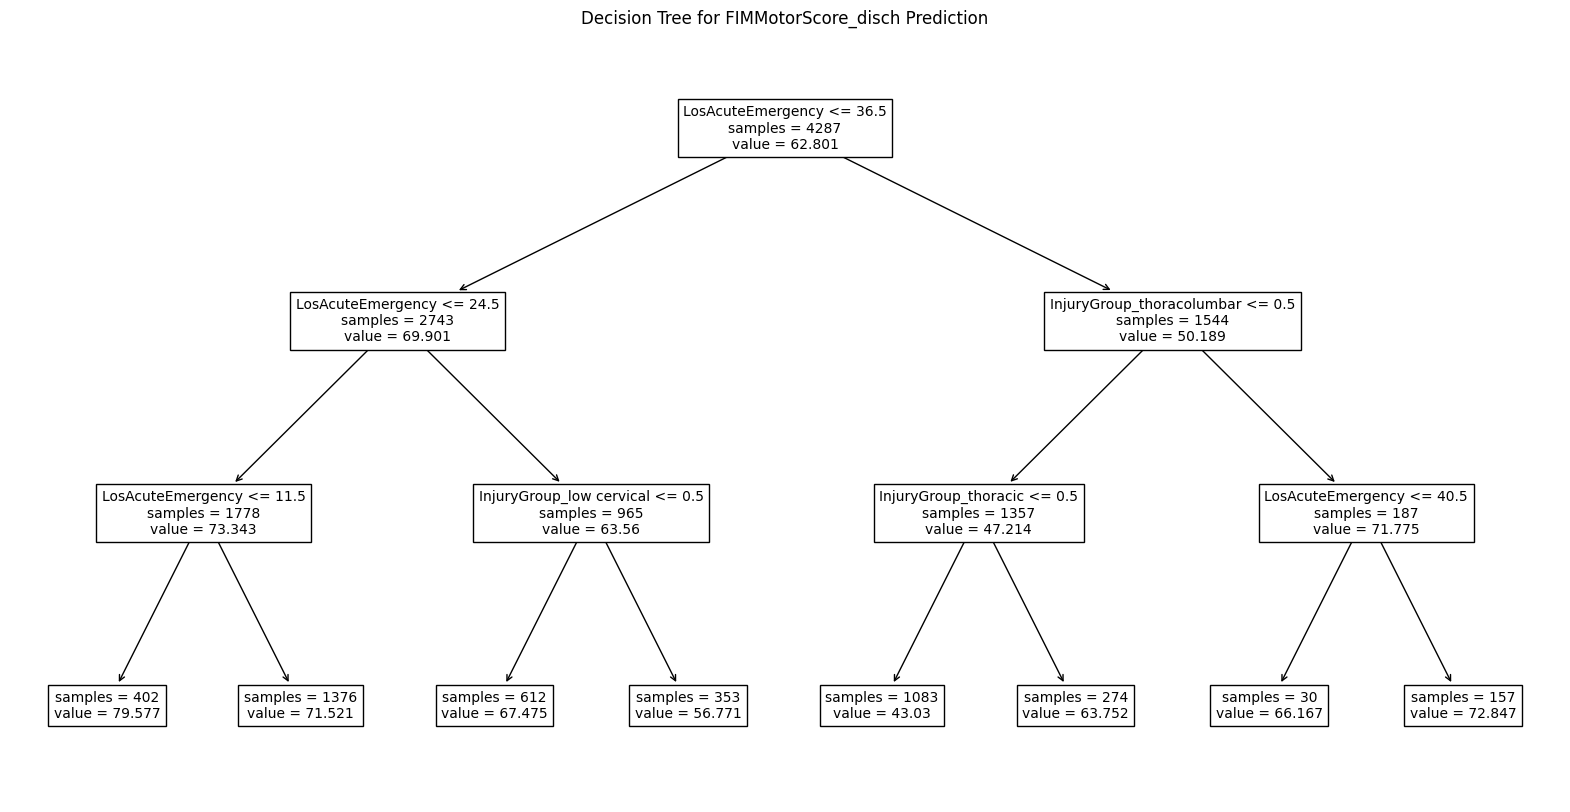

In [51]:
############################# Target variable FIM discharge score #####################


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


data = data.dropna(subset=['FIMMotorScore_disch'])

# Splitting the data into features (X) and target variable (y)
X = data[['InjuryGroup', 'LosAcuteEmergency']]
y = data['FIMMotorScore_disch']

# Convert categorical variable 'InjuryType' into dummy/indicator variables
X = pd.get_dummies(X, columns=['InjuryGroup'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01, max_depth=3)

# Fitting the model
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Calculate R-squared score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R-squared score (Train):", r2_train)
print("R-squared score (Test):", r2_test)

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, fontsize=10, impurity=False)
plt.title("Decision Tree for FIMMotorScore_disch Prediction")
plt.show()


R-squared score (Train): 0.16528829683956048
R-squared score (Test): 0.0965788887163056


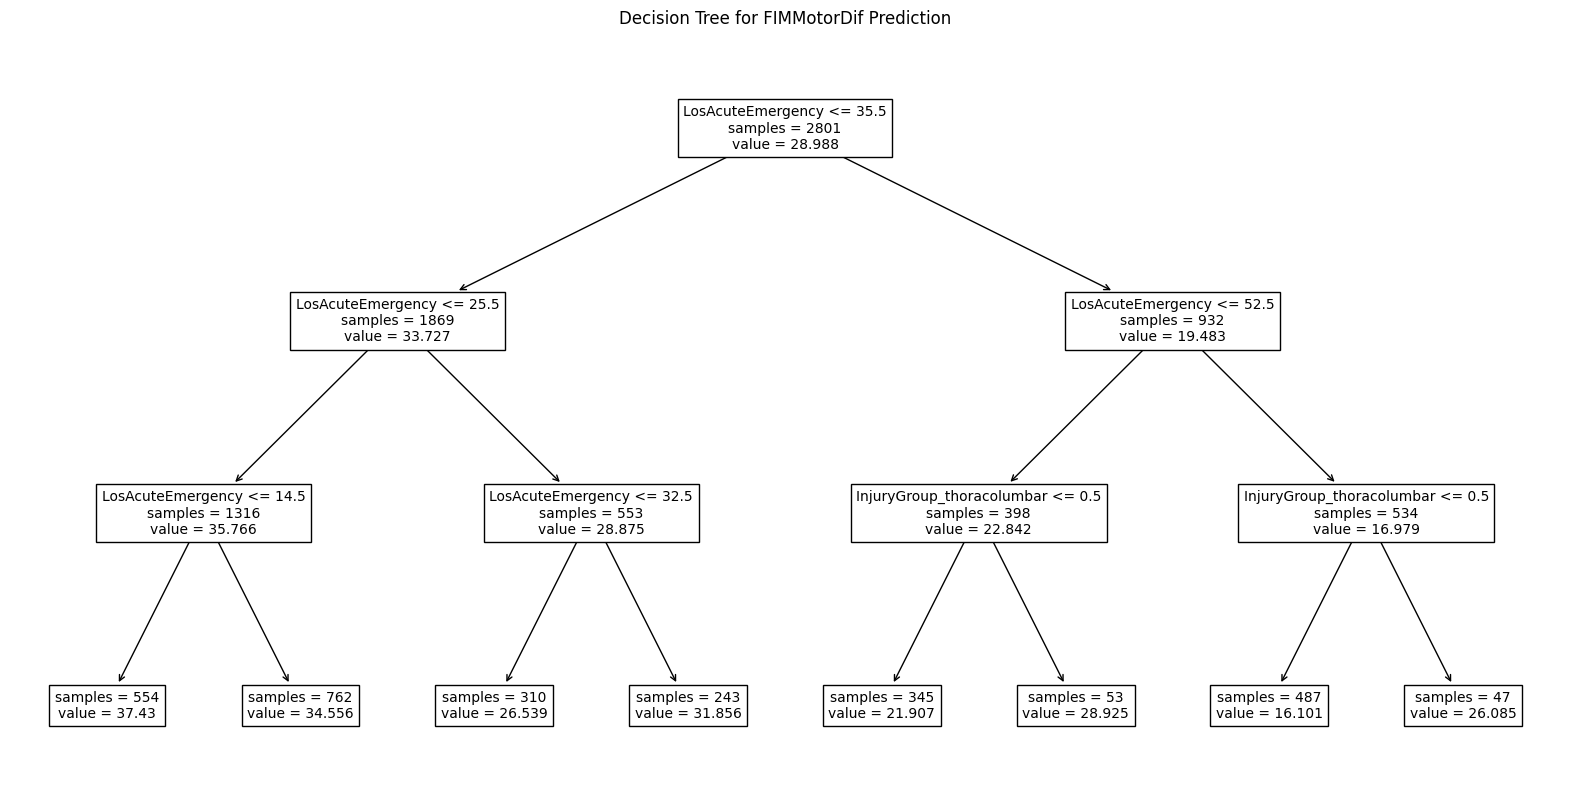

In [52]:
####################### target variable FIMMotorDif #################

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = data.dropna(subset=['FIMMotorDif'])

# Splitting the data into features (X) and target variable (y)
X = data[['InjuryGroup', 'LosAcuteEmergency']]
y = data['FIMMotorDif']

# Convert categorical variable 'InjuryType' into dummy/indicator variables
X = pd.get_dummies(X, columns=['InjuryGroup'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor with pruning
decision_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01, max_depth=3)

# Fitting the model
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Calculate R-squared score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R-squared score (Train):", r2_train)
print("R-squared score (Test):", r2_test)

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, fontsize=10, impurity=False)
plt.title("Decision Tree for FIMMotorDif Prediction")
plt.show()


In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Drop rows with NA values in 'Clusterlabels' column
data.dropna(subset=['Cluster'], inplace=True)

# Extract features and target variable
X = data[['LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif']]  # Features
y = data['Cluster']  # Target variable

# Initialize and train Decision Tree model with max_depth set to 3 for pruning
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X, y)

# Visualize the pruned decision tree with larger tree nodes
plt.figure(figsize=(30, 20))
plot_tree(decision_tree, feature_names=X.columns, filled=True, fontsize=18,impurity=False)
plt.title("Decision Tree for Cluster Prediction")
plt.show()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Set zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


KeyError: ['Cluster']

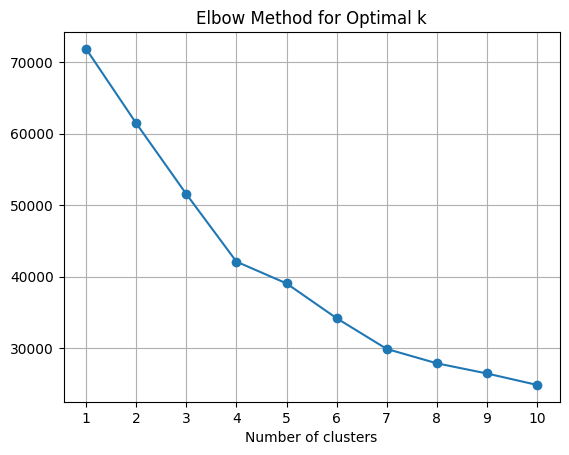

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('C://Users/asonawane/Desktop/project/finaldata.csv')

# Select relevant columns from the dataset
selected_columns = ['PrimaryInjuryLocation', 'InjuryGroup', 'LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif']
df = data[selected_columns]

# Define categorical and numerical features
categorical_features = ['PrimaryInjuryLocation', 'InjuryGroup']
numerical_features = ['LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize the numerical features
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the k-means model
kmeans = KMeans(random_state=42)  # We'll determine the optimal number of clusters later

# Create a pipeline by combining preprocessing and k-means model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit the pipeline to the data to find the optimal number of clusters using the elbow method
pipeline.fit(df)

# Get the inertia (within-cluster sum of squares) for different numbers of clusters
inertia = []
for k in range(1, 11):  # Try cluster numbers from 1 to 10
    pipeline.named_steps['kmeans'].set_params(n_clusters=k)  # Update the number of clusters
    pipeline.fit(df)
    inertia.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()


In [56]:


# Define the k-means model with 4 clusters explicitly
kmeans = KMeans(n_clusters=4, random_state=42)

# Create a pipeline by combining preprocessing and k-means model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit the pipeline to the data
pipeline.fit(df)

# Add cluster labels to the original DataFrame
df_clustered = df.copy()  # Make a copy of the DataFrame
df_clustered['Cluster'] = pipeline.predict(df)

# Save the DataFrame with cluster labels to a new CSV file
df_clustered.to_csv('C://Users/asonawane/Desktop/project/finaldata_with_clusters.csv', index=False)

# Visualize clusters using TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(pipeline.named_steps['preprocessor'].transform(df))

plt.scatter(svd_result[:, 0], svd_result[:, 1], c=df_clustered['Cluster'], cmap='viridis')
plt.title('K-means Clustering with 4 clusters')

plt.colorbar(label='Cluster')
plt.show()


NameError: name 'TruncatedSVD' is not defined

In [57]:
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Handle missing values in the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Calculate silhouette score
silhouette_avg = silhouette_score(numeric_df_imputed, df_clustered['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=data)



plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()



NameError: name 'numeric_df' is not defined

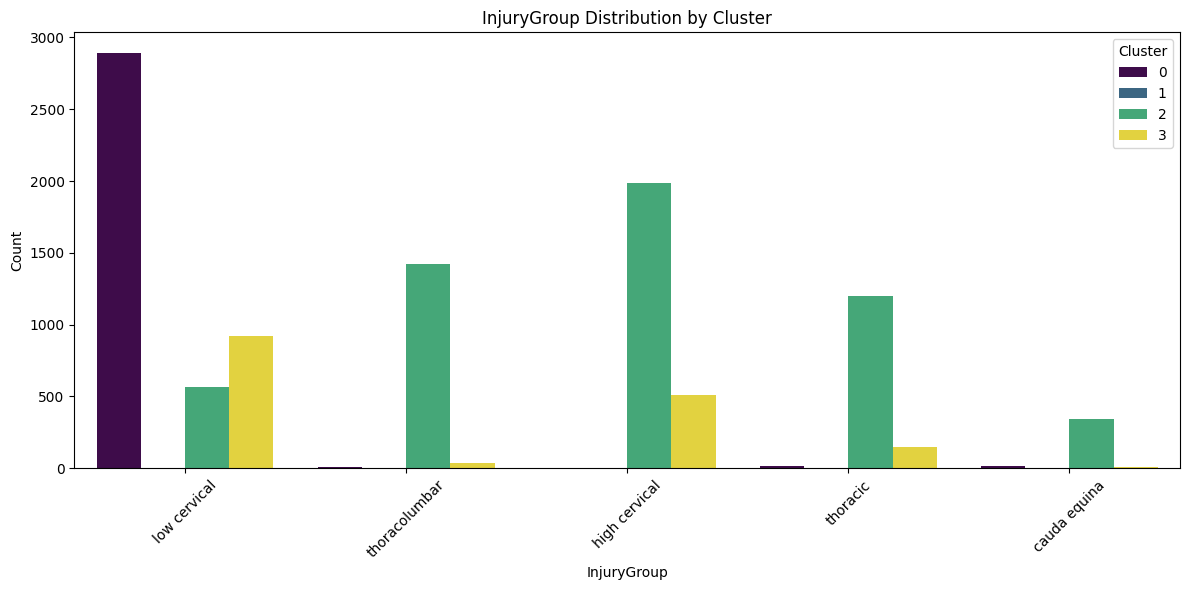

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C://Users/asonawane/Desktop/project/finaldata_with_clusters.csv')


# Define categorical column
categorical_column = 'InjuryGroup'

# Plot categorical column using count plots
plt.figure(figsize=(12, 6))
sns.countplot(x=categorical_column, hue='Cluster', data=df, palette='viridis')
plt.title(f'{categorical_column} Distribution by Cluster')
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


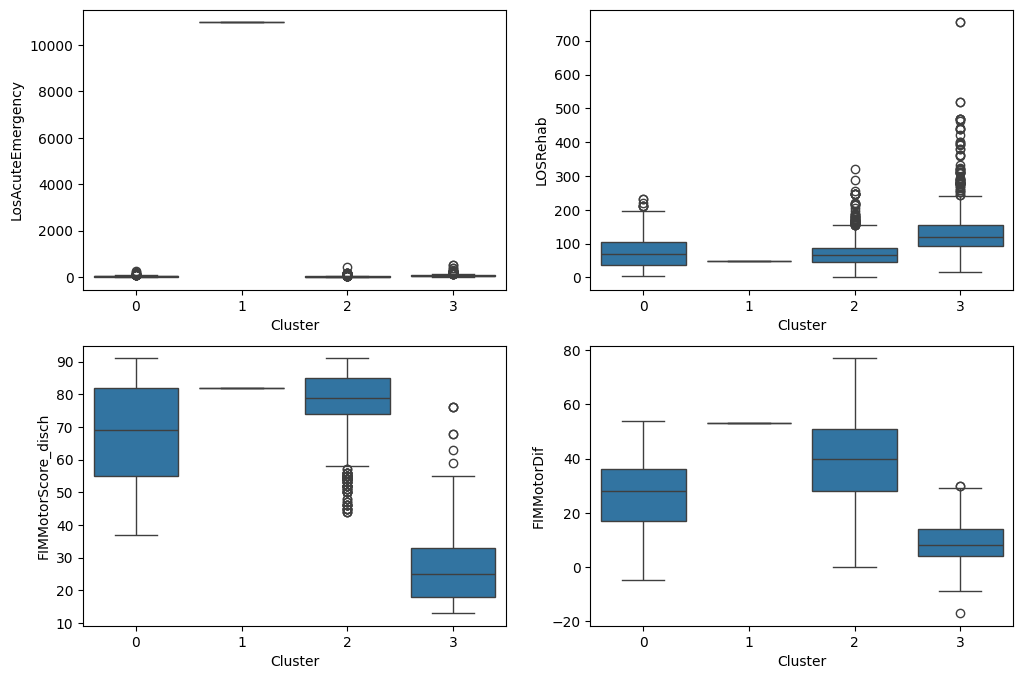

In [59]:
# Load the DataFrame with cluster labels
df_clustered = pd.read_csv('C://Users/asonawane/Desktop/project/finaldata_with_clusters.csv')

# Handle missing values
df_clustered.dropna(subset=['LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif'], inplace=True)


# Visualize the relationships using box plots
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=variable, data=df_clustered)
    


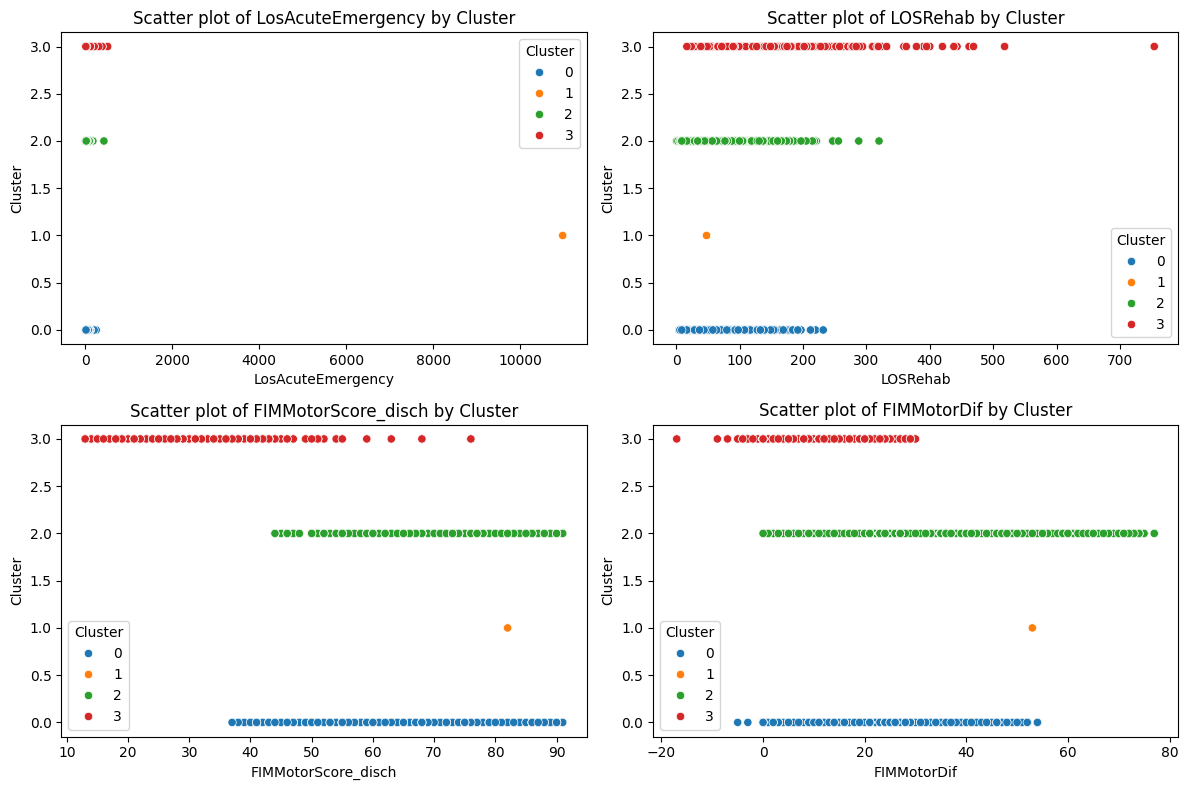

In [60]:
# Handle missing values
df_clustered.dropna(subset=['LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif'], inplace=True)

# Visualize the relationships using scatter plots
plt.figure(figsize=(12,8))
variables = ['LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif']
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=variable, y='Cluster', data=df_clustered, hue='Cluster', palette='tab10')
    plt.title(f'Scatter plot of {variable} by Cluster')
    plt.xlabel(variable)
    plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


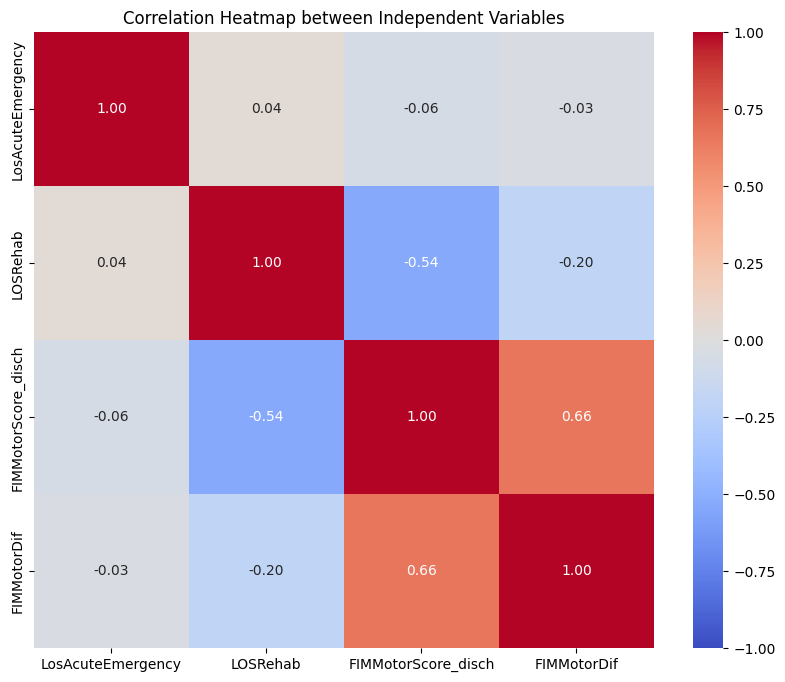

In [61]:
# Create a correlation matrix between independent variables and cluster labels
corr_matrix = df_clustered[['LosAcuteEmergency', 'LOSRehab', 'FIMMotorScore_disch', 'FIMMotorDif']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Correlation Heatmap between Independent Variables')
plt.show()


R2 score on training data for low cervical: 0.27620018129737933
R2 score on testing data for low cervical: 0.2913254238005274


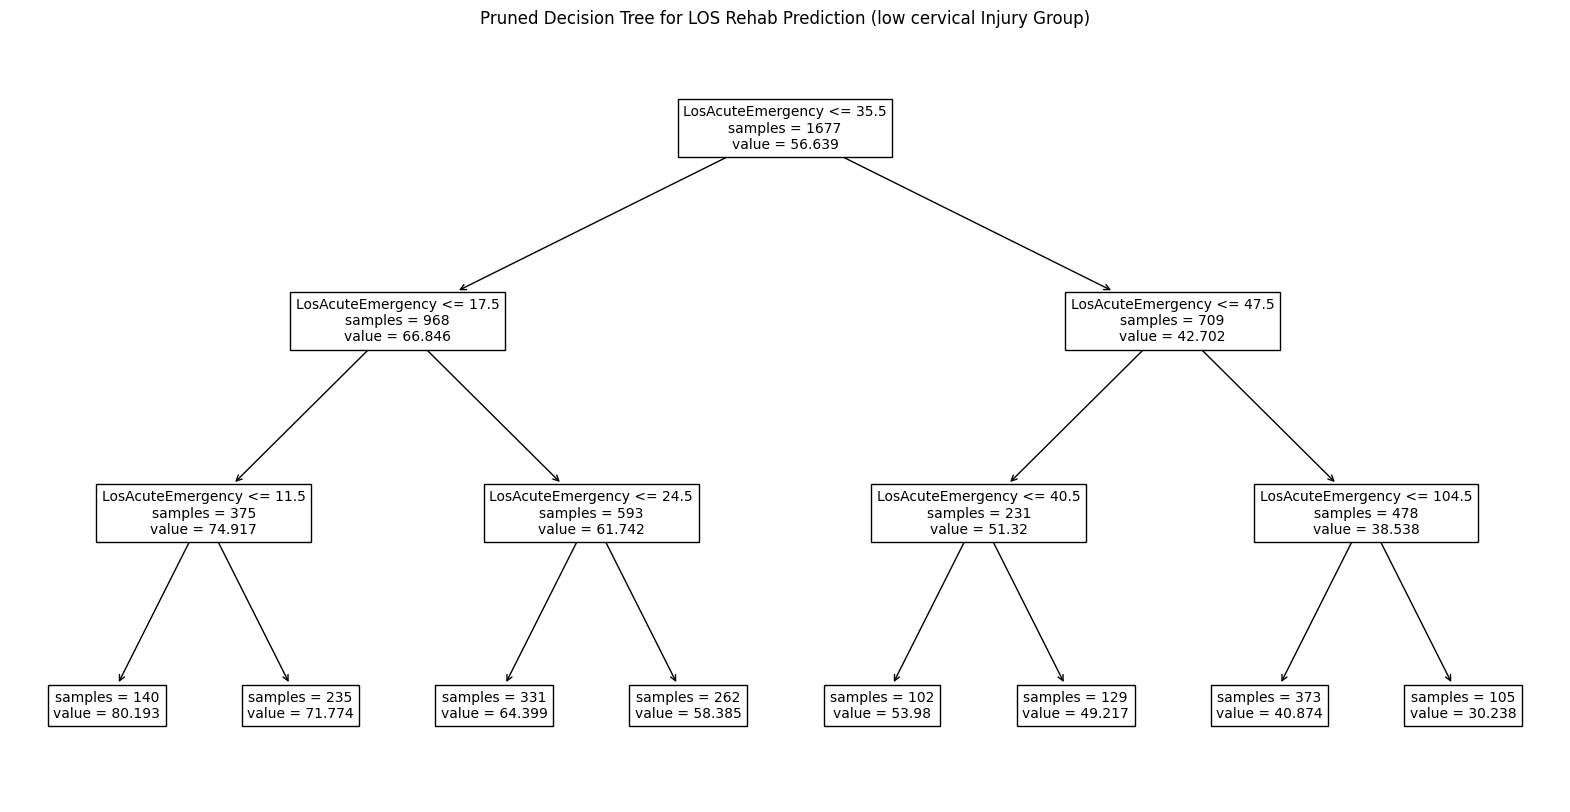

R2 score on training data for thoracolumbar: 0.09430343183623902
R2 score on testing data for thoracolumbar: -0.015747158769167102


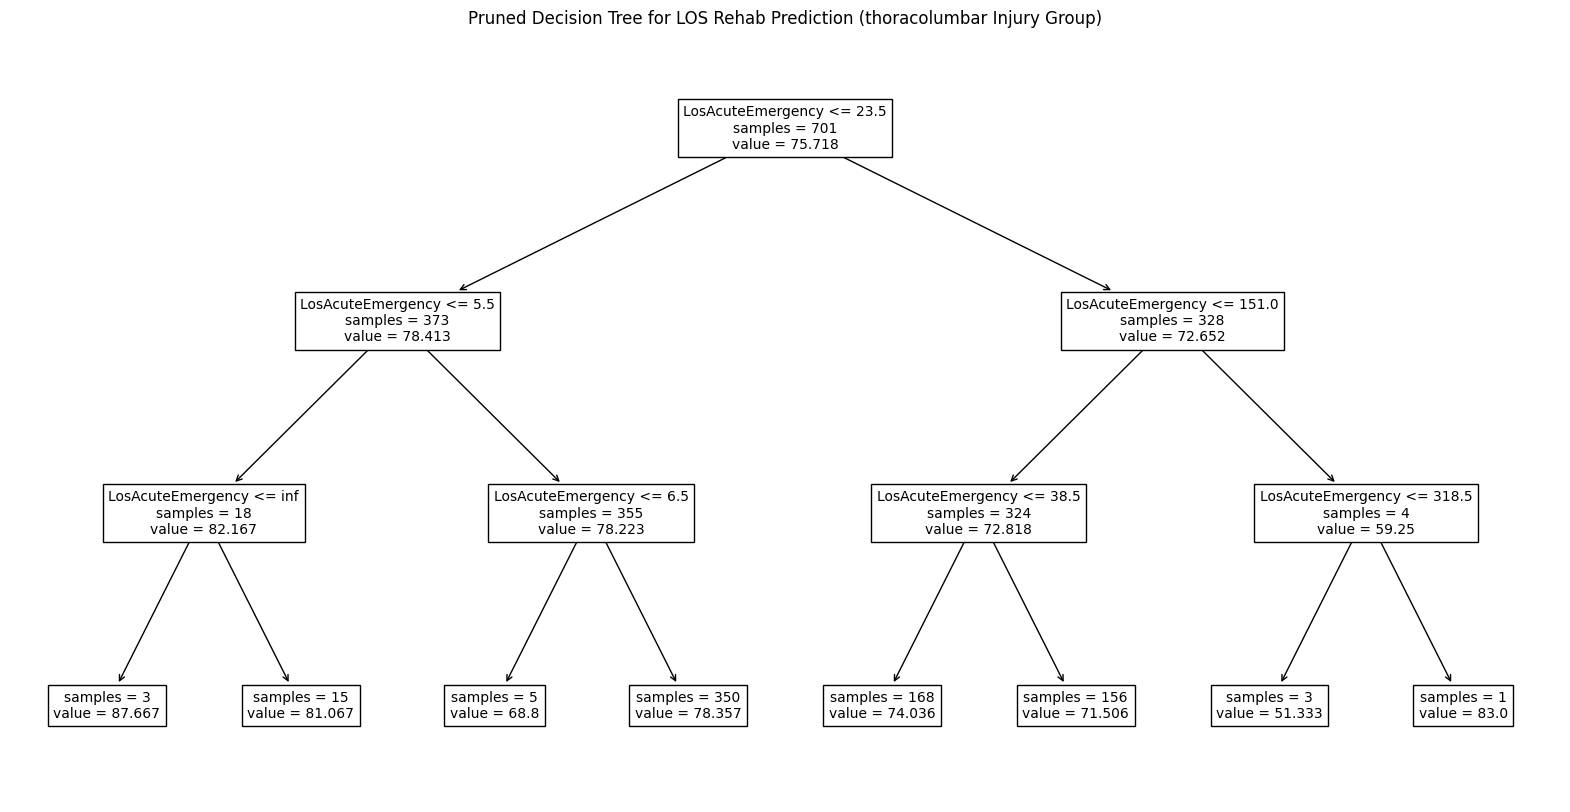

R2 score on training data for high cervical: 0.31859369160878936
R2 score on testing data for high cervical: 0.28187592790815996


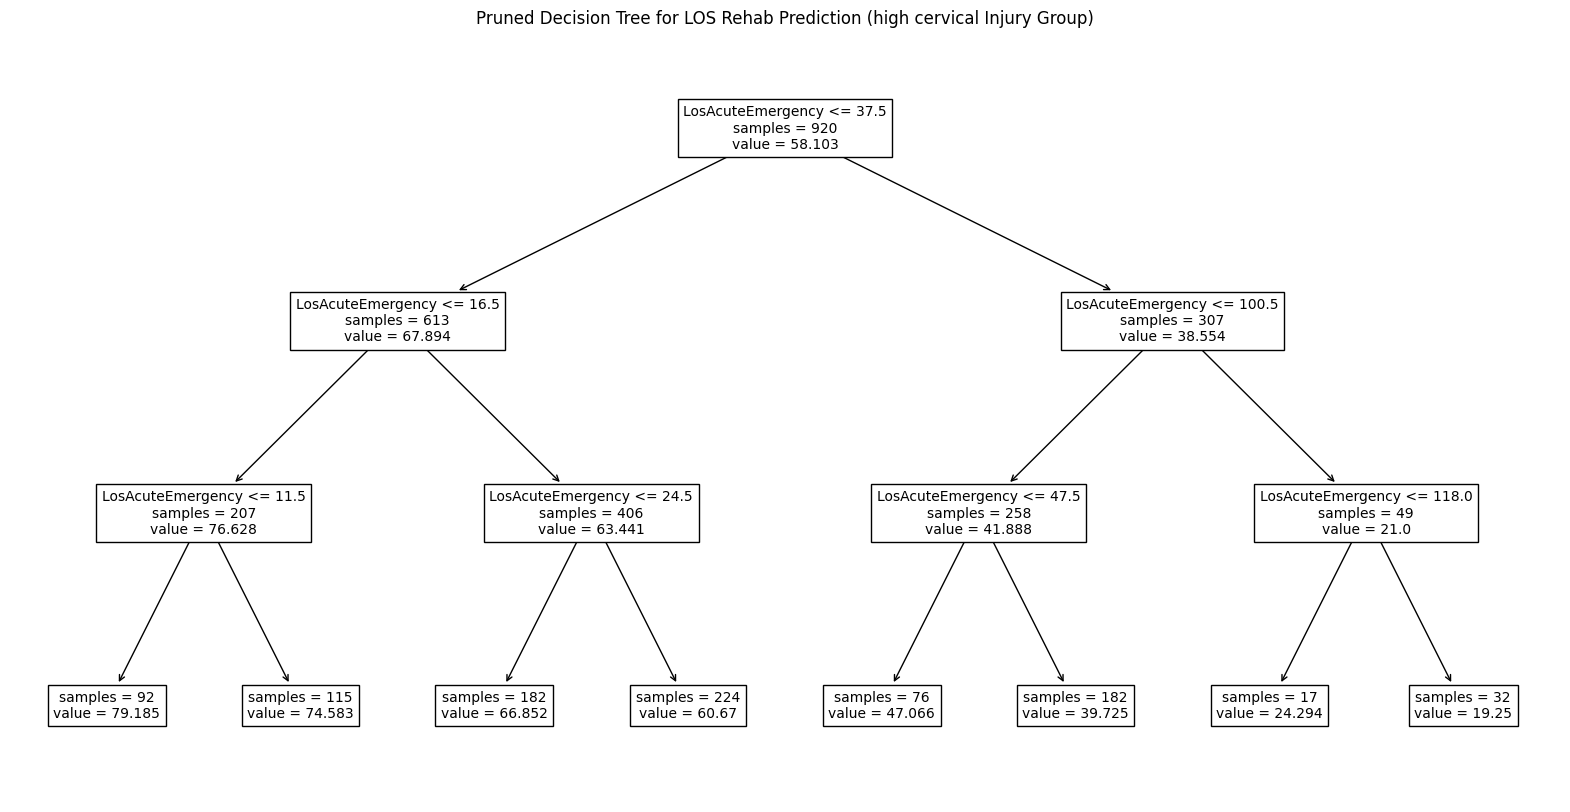

R2 score on training data for thoracic: 0.12831559957034122
R2 score on testing data for thoracic: 0.027880617472357816


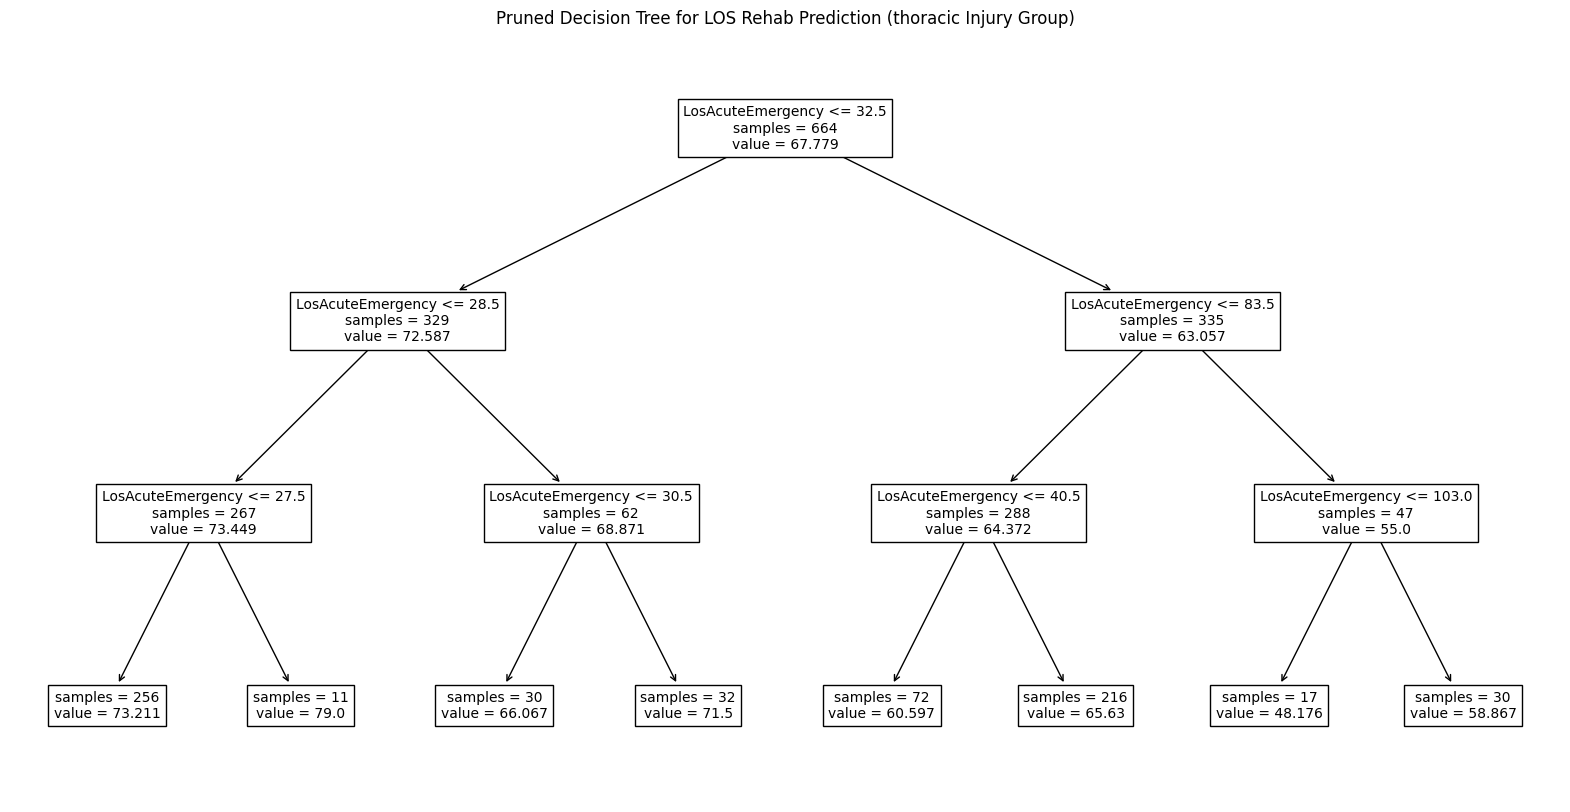

R2 score on training data for cauda equina: 0.3171762134298073
R2 score on testing data for cauda equina: -0.07612116159194171


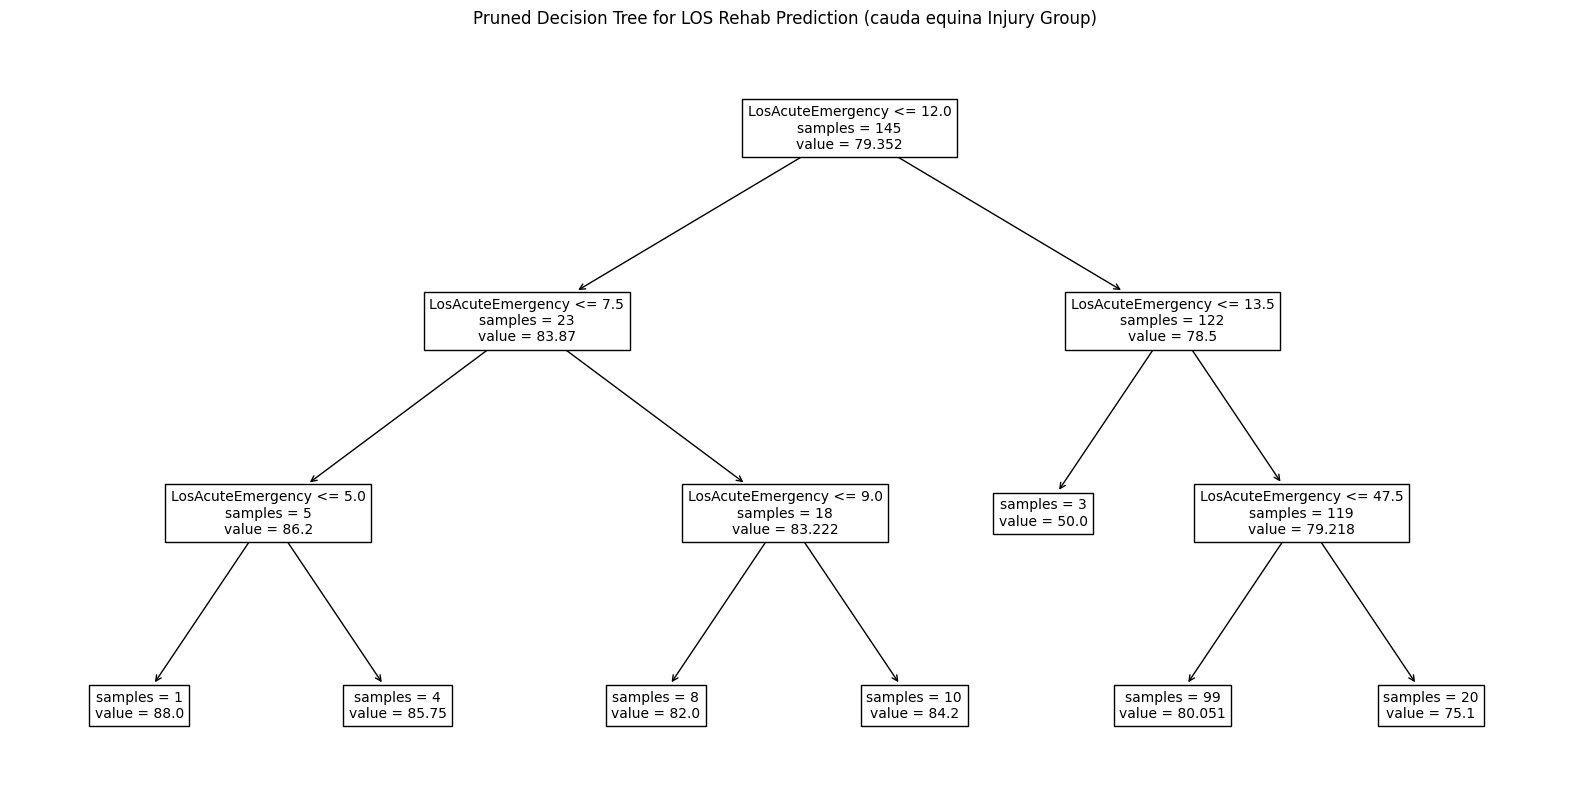

In [62]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' contains the dataset with 'LOSRehab', 'InjuryGroup', 'LosAcuteEmergency', and 'fimmotordisch' columns
data = data.dropna(subset=['LOSRehab', 'FIMMotorScore_disch'])

# Filter out rows with NA values in the 'InjuryGroup' column
data = data.dropna(subset=['InjuryGroup'])

# Get unique categories in the 'InjuryGroup' column
injury_groups = data['InjuryGroup'].unique()

# Iterate over each category and create a decision tree
for group in injury_groups:
    # Filter the dataset for the current injury group
    data_group = data[data['InjuryGroup'] == group]
    
    # Splitting the data into features (X) and target variable (y)
    X = data_group[['LosAcuteEmergency']]
    y = data_group['FIMMotorScore_disch']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Decision Tree Regressor with pruning
    decision_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01, max_depth=3)

    # Fitting the model
    decision_tree.fit(X_train, y_train)

    # Making predictions
    y_pred_train = decision_tree.predict(X_train)
    y_pred_test = decision_tree.predict(X_test)

    # Calculating R2 score
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"R2 score on training data for {group}: {r2_train}")
    print(f"R2 score on testing data for {group}: {r2_test}")

    # Visualizing the pruned decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=X.columns, fontsize=10, impurity=False)
    plt.title(f"Pruned Decision Tree for LOS Rehab Prediction ({group} Injury Group)")
    plt.show()


R2 score on training data for low cervical: 0.15336944734981273
R2 score on testing data for low cervical: 0.10004918864559009


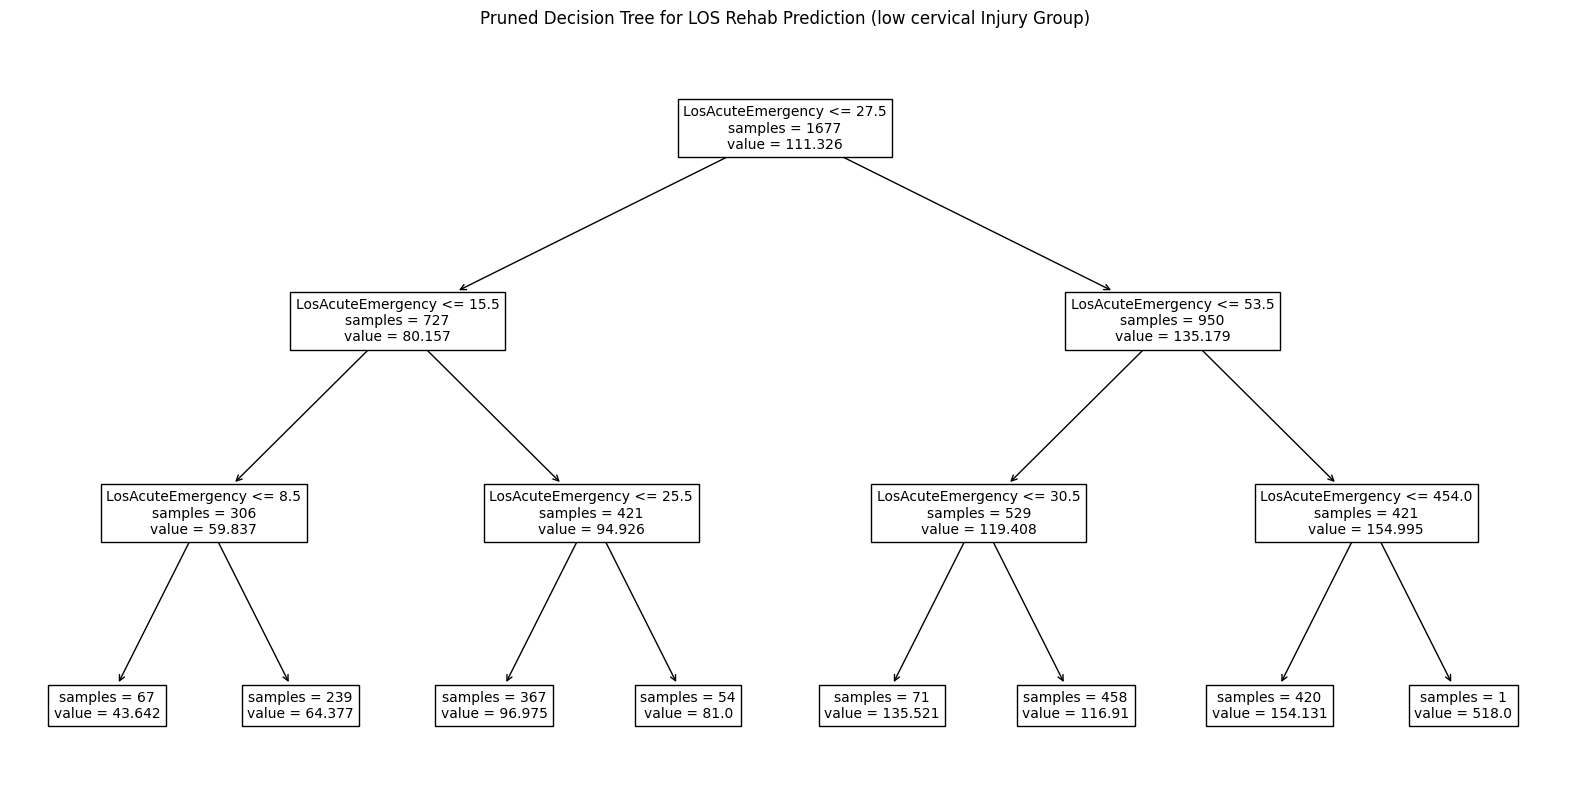

R2 score on training data for thoracolumbar: 0.14712827882407187
R2 score on testing data for thoracolumbar: -0.03331972946195538


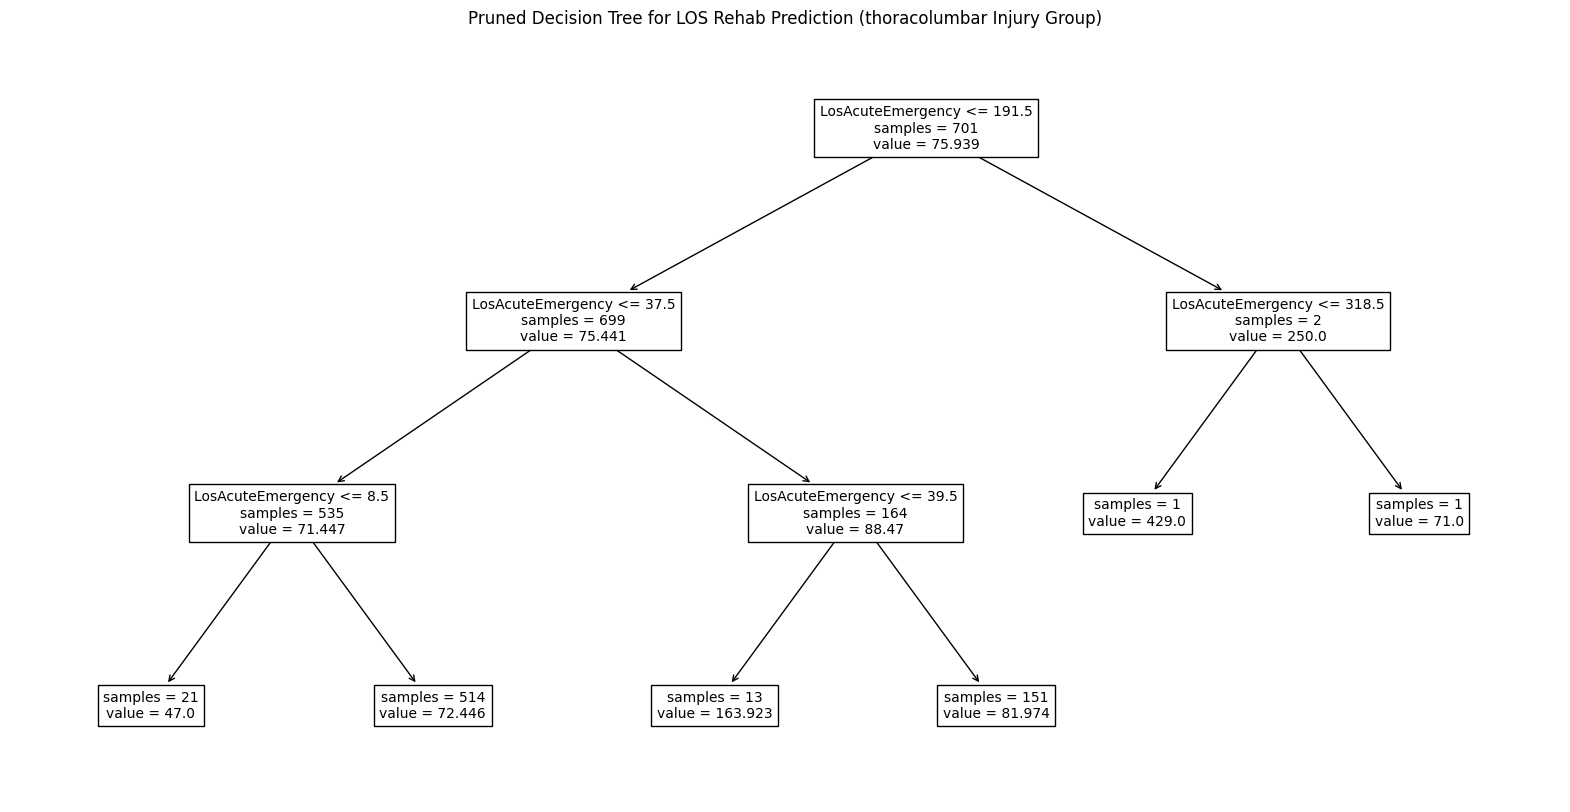

R2 score on training data for high cervical: 0.16658098982242997
R2 score on testing data for high cervical: 0.18237652731475795


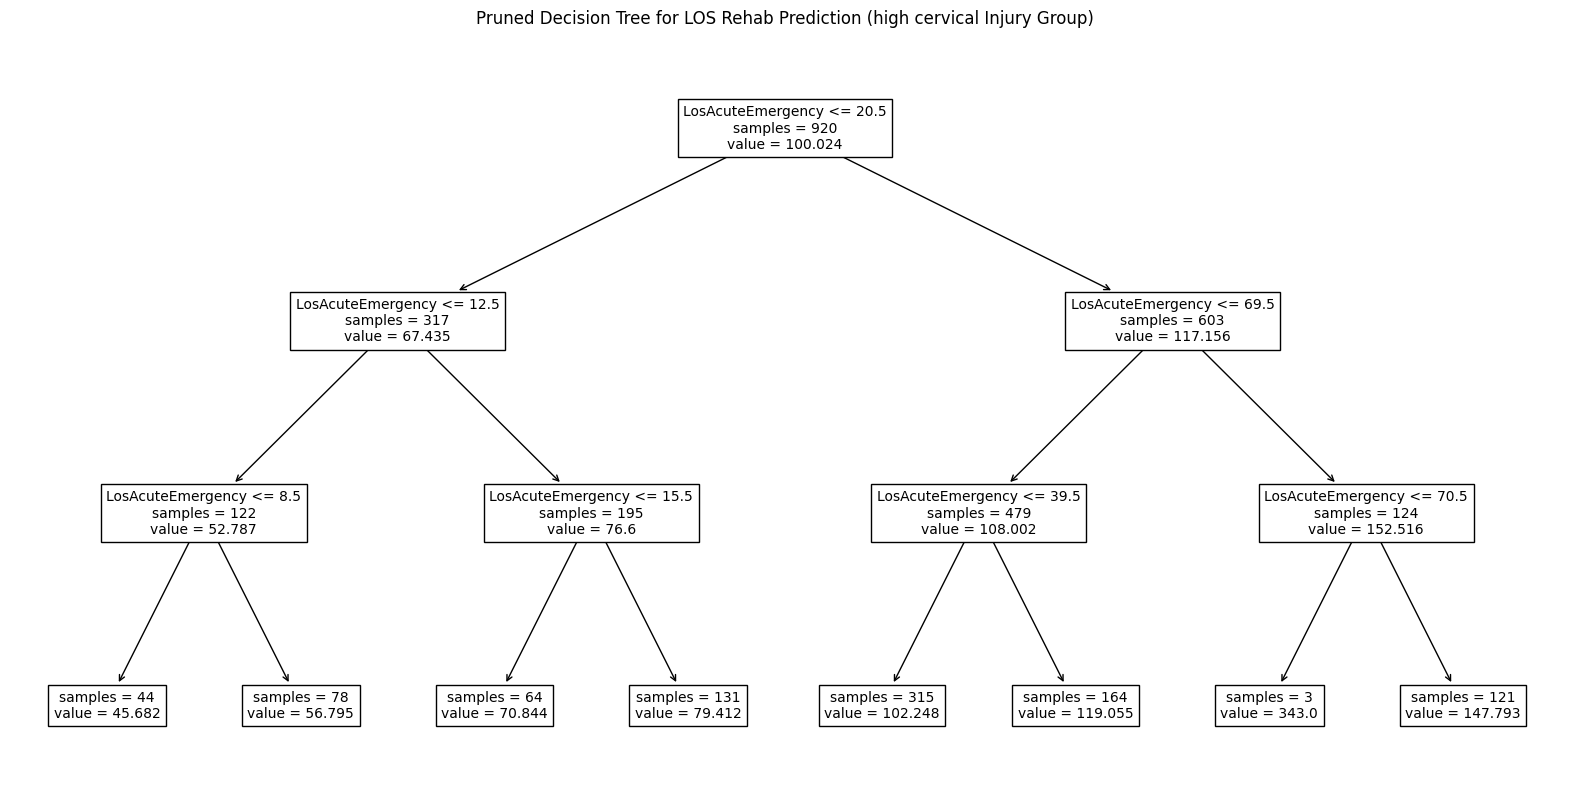

R2 score on training data for thoracic: 0.11649117450890756
R2 score on testing data for thoracic: 0.06336439987001519


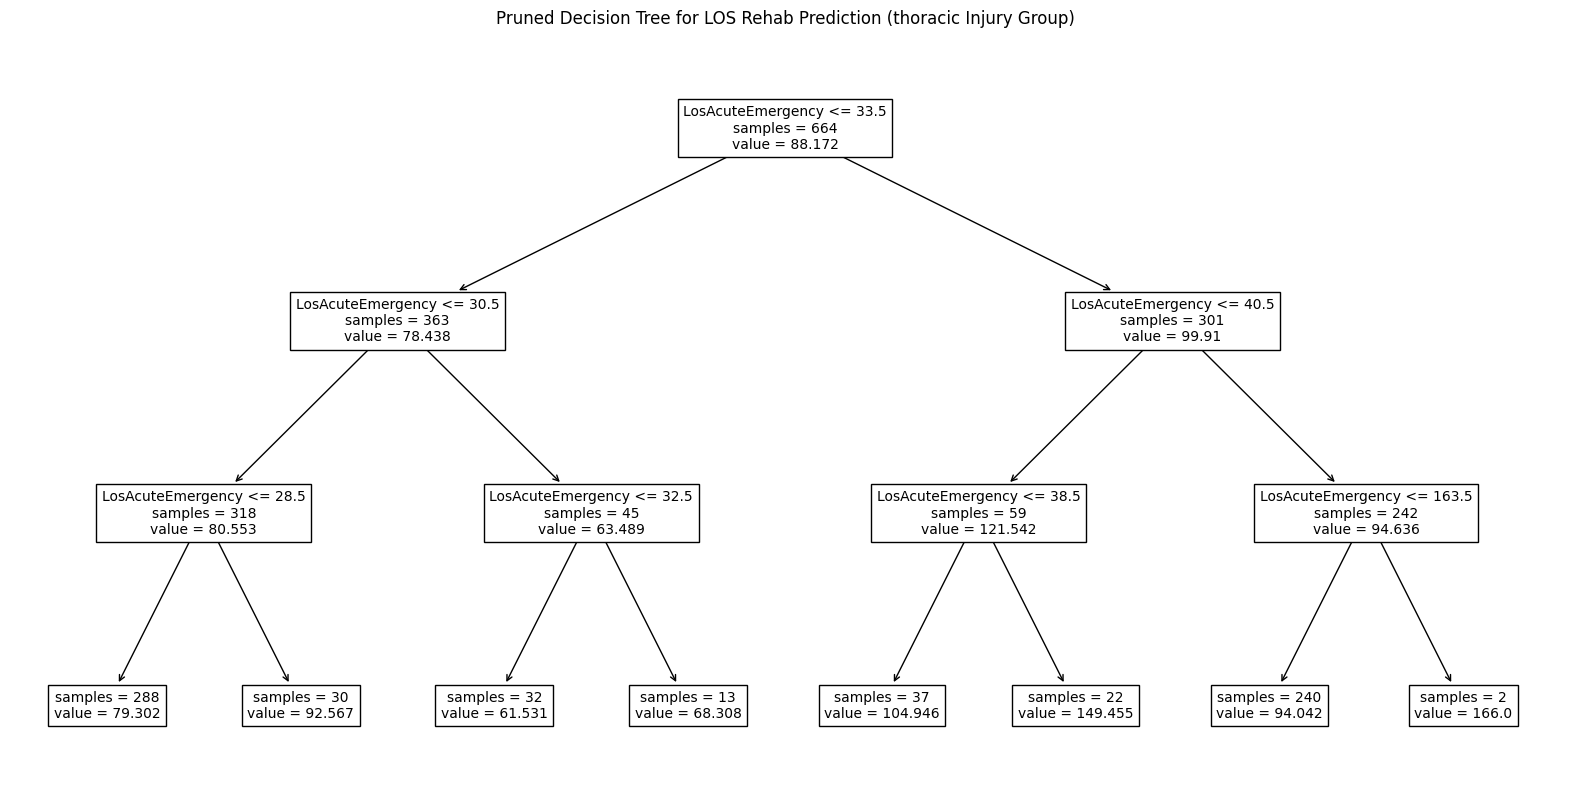

R2 score on training data for cauda equina: 0.237429581579656
R2 score on testing data for cauda equina: -0.0009319517247146081


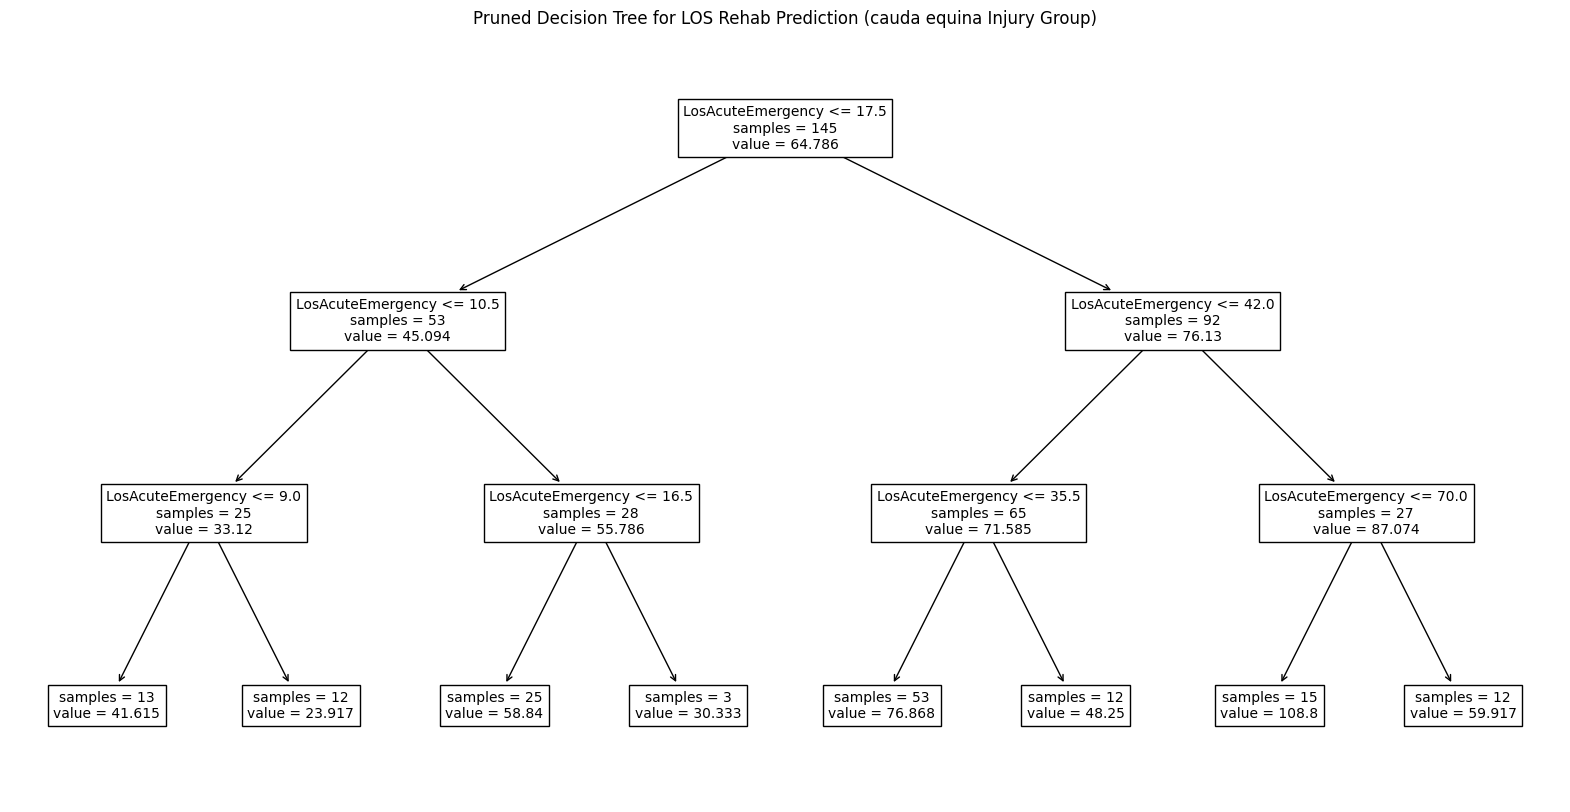

In [63]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' contains the dataset with 'LOSRehab', 'InjuryGroup', 'LosAcuteEmergency', and 'fimmotordisch' columns
data = data.dropna(subset=['LOSRehab', 'FIMMotorScore_disch'])

# Filter out rows with NA values in the 'InjuryGroup' column
data = data.dropna(subset=['InjuryGroup'])

# Get unique categories in the 'InjuryGroup' column
injury_groups = data['InjuryGroup'].unique()

# Iterate over each category and create a decision tree
for group in injury_groups:
    # Filter the dataset for the current injury group
    data_group = data[data['InjuryGroup'] == group]
    
    # Splitting the data into features (X) and target variable (y)
    X = data_group[['LosAcuteEmergency']]
    y = data_group['LOSRehab']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Decision Tree Regressor with pruning
    decision_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01, max_depth=3)

    # Fitting the model
    decision_tree.fit(X_train, y_train)

    # Making predictions
    y_pred_train = decision_tree.predict(X_train)
    y_pred_test = decision_tree.predict(X_test)

    # Calculating R2 score
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"R2 score on training data for {group}: {r2_train}")
    print(f"R2 score on testing data for {group}: {r2_test}")

    # Visualizing the pruned decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=X.columns, fontsize=10, impurity=False)
    plt.title(f"Pruned Decision Tree for LOS Rehab Prediction ({group} Injury Group)")
    plt.show()
